Levi Davis (ljd3frf@virginia.edu)
University of Virginia, DS 5001: Exploratory Text Analysis, Spring 2023

# Setup / Input Data

In [47]:
import requests
import json
import numpy as np
import pandas as pd
import os
import copy
import re
import nltk
import contractions
import seaborn as sns
from numpy.linalg import norm
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import pdist,squareform
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy.linalg import eigh
import plotly_express as px
import plotly.io as pio
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.lda_model
from gensim.models import word2vec
from sklearn.manifold import TSNE
import pickle
import kaleido
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from IPython.display import display, HTML
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

# Path to dataset files
data_path = f"{os.getcwd()}\\data"

In [48]:
Artist_regions = {
            '21 Savage': 'Atlanta, GA',
            '2 Live Crew': 'Miami, FL',
            '2Pac':'Los Angeles, CA',
            '50 Cent': 'Queens, NY',
            '42 Dugg': 'Detroit, MI',
            'A$AP Rocky': 'Harlem, NY',
            'Afrika Bambaataa': 'Bronx, NY',
            'André 3000': 'Atlanta, GA',
            'A Tribe Called Quest': 'Queens, NY',
            'Beastie Boys':'Brooklyn, NY',
            'Big Daddy Kane': 'Brooklyn, NY',
            'Big Sean': 'Detroit, MI',
            'Biz Markie': 'Harlem, NY',
            'Boogie Down Productions': 'South Bronx, NY',
            'Bone Thugs-N-Harmony': 'Cleveland, OH',
            'Busta Rhymes': 'Brooklyn, NY',
            'Chance the Rapper': 'Chicago, IL',
            'Chief Keef': 'Chicago, IL',
            'Coolio': 'Compton, CA',
            'Common': 'Chicago, IL',
            'Cordae': 'Suitland, MD',
            'Cypress Hill': 'Los Angeles, CA',
            'DaBaby': 'Charlotte, NC',
            'De La Soul': 'Amityville, NY',
            'Denzel Curry': 'Carol City, FL',
            'Digital Underground': 'Oakland, CA',
            'DJ Jazzy Jeff & The Fresh Prince': 'West Philadelphia, PA',
            'DMX': 'Yonkers, NY',
            'Don Toliver': 'Houston, TX',
            'Dr. Dre': 'Compton, CA',
            'Drake': 'Toronto, ON',
            'E-40': 'Vallejo, CA',
            'Eazy-E': 'Compton, CA',
            'Eminem': 'Detroit, MI',
            'EPMD': 'Brentwood, NY',
            'Eric B. & Rakim': 'Long Island, NY',
            'Fugees': 'South Orange, NJ',
            'Frank Ocean': 'New Orleans, LA',
            'Future': 'Atlanta, GA',
            'Gang Starr': 'Brooklyn, NY',
            'Geto Boys': 'Houston, TX',
            'Grandmaster Flash': 'South Bronx, NY',
            'Gunna': 'Atlanta, GA',
            'Heavy D': 'Mount Vernon, NY',
            'Ice Cube': 'Los Angeles, CA',
            'Ice-T': 'Los Angeles, CA',
            'J. Cole': 'Fayetteville, NC',
            'JAY-Z': 'Brooklyn, NY',
            'JID': 'East Atlanta, GA',
            'Jack Harlow': 'Louisville, KY',
            'Juice WRLD': 'Chicago, IL',
            'Kanye West': 'Chicago, IL',
            'Kendrick Lamar': 'Compton, CA',
            'Kid Cudi': 'Cleveland, OH',
            'Kodak Black': 'Pompano Beach, FL',
            'Kool Moe Dee': 'Treasure Island, NY',
            'KRS-One': 'The Bronx, NY',
            'Kurtis Blow': 'Harlem, NY',
            'Lauryn Hill': 'South Orange, NJ',
            'Lil Baby': 'Atlanta, GA',
            'Lil Durk':'Chicago, IL',
            "Lil’ Kim": 'Brooklyn, NY',
            'Lil Uzi Vert': 'Philadelphia, PA',
            'Lil Wayne': 'New Orleans, LA',
            'LL Cool J': 'Queens, NY',
            'Ludacris': 'Atlanta, GA',
            'Mac Miller': 'Pittsburgh, PA',
            'MC Lyte': 'Brooklyn, NY',
            'Megan Thee Stallion': 'Houston, TX',
            'Method Man': 'Staten Island, NY',
            'Missy Elliott': 'Portsmouth, VA',
            'N.W.A': 'Los Angeles, CA',
            'Nas': 'Queensbridge, NY',
            'Nate Dogg': 'Long Beach, CA',
            'Naughty By Nature': 'East Orange, NJ',
            'Nelly': 'St. Louis, MO',
            'Nicki Minaj': 'Queens, NY',
            "Ol’ Dirty Bastard": 'Brooklyn, NY',
            'OutKast': 'Atlanta, GA',
            'Polo G': 'Chicago, IL',
            'Pop Smoke': 'Brooklyn, NY',
            'Post Malone': 'Syracuse, NY',
            'Public Enemy': 'Long Island, NY',
            'Pusha T': 'Virginia Beach, VA',
            'Queen Latifah': 'East Orange, NJ',
            'Redman': 'Newark, NJ',
            'Rod Wave': 'St. Petersburg, FL',
            'Run–DMC': 'Queens, NY',
            'Salt-N-Pepa': 'Queens, NY',
            'Scarface': 'Houston, TX',
            'Sir Mix-a-Lot': 'Seattle, WA',
            'Snoop Dogg': 'Long Beach, CA',
            'Sugarhill Gang & The Furious Five': 'New York, NY',
            'T.I.': 'Atlanta, GA',
            'Tech N9ne': 'Kansas City, MO',
            'The Game': 'Compton, CA',
            'Three 6 Mafia': 'Memphis, TN',
            'Too $hort': 'Oakland, CA',
            'T-Pain': 'Tallahassee, FL',
            'Travis Scott': 'Houston, TX',
            'Trippie Redd': 'Canton, OH',
            'Tyler, The Creator': 'Los Angeles, CA',
            'Twista': 'Chicago, IL',
            'Warren\xa0G': 'Long Beach, CA',
            'Wu-Tang Clan': 'Staten Island, NY',
            'Yasiin Bey': 'Brooklyn, NY',
            'YoungBoy Never Broke Again': 'Baton Rouge, LA',
            'Young Thug': 'Atlanta, GA',
            'Ab-Soul': 'Los Angeles, CA',
            'Action Bronson': 'Queens, NY',
            'Adele': 'Tottenham, London, England',
            'Anderson .Paak': 'Oxnard, CA',
            'Azealia Banks': 'Harlem, NY',
            'Bas': 'Queens, NY',
            'Benny the Butcher': 'Buffalo, NY',
            'Big K.R.I.T.': 'Meridian, MS',
            'BROCKHAMPTON': 'San Marcos, TX',
            'Cardi B': 'The Bronx, NY',
            '\u200bclipping.': 'Los Angeles, CA',
            'Danny Brown': 'Detroit, MI',
            'DeJ Loaf': 'Detroit, MI',
            'Del the Funky Homosapien': 'Oakland, CA',
            'Earl Sweatshirt': 'Los Angeles, CA',
            'Freddie Gibbs': 'Gary, IN',
            'Ghostface Killah': 'Staten Island, NY',
            'GoldLink': 'Washington, D.C.',
            'The Notorious B.I.G.': 'Brooklyn, NY',
            'Ab-Soul': 'Los Angeles, CA',
            'Action Bronson': 'Queens, NY',
            'Adele': 'Tottenham, London, England',
            'Anderson .Paak': 'Oxnard, CA',
            'Azealia Banks': 'Harlem, NY',
            'Bas': 'Queens, NY',
            'Benny the Butcher': 'Buffalo, NY',
            'Big K.R.I.T.': 'Meridian, MS',
            'BROCKHAMPTON': 'San Marcos, TX',
            'Cardi B': 'The Bronx, NY',
            '\u200bclipping.': 'Los Angeles, CA',
            'Danny Brown': 'Detroit, MI',
            'DeJ Loaf': 'Detroit, MI',
            'Del the Funky Homosapien': 'Oakland, CA',
            'Earl Sweatshirt': 'Los Angeles, CA',
            'Freddie Gibbs': 'Gary, IN',
            'Ghostface Killah': 'Staten Island, NY',
            'GoldLink': 'Washington, DC',
            'The Notorious B.I.G.': 'Brooklyn, NY',
            'Baby Keem': 'Las Vegas, NV',
            'City Girls': 'Miami, FL',
            'Doja Cat': 'Los Angeles, CA',
            'Gucci Mane': 'Birmingham, AL',
            'GZA': 'Brooklyn, NY',
            'Isaiah Rashad': 'Chattanooga, TN',
            'Jay Rock': 'Los Angeles, CA',
            'Joey Bada$$': 'Brooklyn, NY',
            'Jonwayne': 'La Habra, CA',
            'JPEGMAFIA': 'Baltimore, MD',
            'JUNGLEPUSSY': 'New York City, NY',
            'Kali Uchis': 'Alexandria, VA',
            'Kamaiyah': 'Oakland, CA',
            'Killer Mike': 'Atlanta, GA',
            'Knxwledge': 'Philadelphia, PA',
            'Kota the Friend': 'Brooklyn, NY',
            'Lil Nas X': 'Atlanta, GA',
            'Lil Tecca': 'Queens, NY',
            'Lil Tjay': 'Bronx, NY',
            'Little Simz': 'Islington, London, UK',
            'Lizzo': 'Houston, TX',
            'Logic': 'Gaithersburg, MD',
            'Lupe Fiasco': 'Chicago, IL',
            'M.I.A.': 'London, UK',
            'Madlib': 'Oxnard, CA',
            'Megan Thee Stallion': 'Houston, TX',
            'Mick Jenkins': 'Huntsville, AL',
            'Mobb Deep': 'Queensbridge, NY',
            'Mr. Lif': 'Boston, MA',
            'NLE Choppa': 'Memphis, TN',
            'Noname': 'Chicago, IL',
            'Odd Future': 'Los Angeles, CA',
            'Open Mike Eagle': 'Chicago, IL',
            'Pharoahe Monch': 'South Jamaica, Queens, NY',
            'Princess Nokia': 'New York City, NY',
            'Quelle Chris': 'Detroit, MI',
            'Rapsody': 'Snow Hill, NC',
            'Rico Nasty': 'Brooklyn, MD',
            'Royce da 5\'9"': 'Detroit, MI',
            'Run The Jewels': 'Atlanta, GA',
            'Sa-Roc': 'Washington, DC',
            'Saweetie': 'Santa Clara County, CA',
            'ScHoolboy Q': 'Los Angeles, CA',
            'Shabazz Palaces': 'Seattle, WA',
            'Ski Mask the Slump God': 'Broward County, FL',
            'Skyzoo': 'Brooklyn, NY',
            'Smoke DZA': 'Harlem, NY',
            'Solange': 'Houston, TX',
            'Soulja Boy': 'Chicago, IL',
            'Vince Staples': 'Long Beach, CA',
            'Wale': 'Washington, DC',
            'YG': 'Compton, CA',
            'Yung Bans': 'Atlanta, GA',
            'Migos': 'Lawrenceville, GA'
              }

### Create artsit DF

In [49]:
def Artist_DF(filename):
    '''
    Make Dataframe from artist JSON file
    - returns a dataframe of artist songs with pre-processed lyrics
    '''
    with open(filename) as user_file:
        file_contents = user_file.read()
    
    parsed_json = json.loads(file_contents)

    song_ids = list()
    song_titles = list()
    song_dates = list()
    primary_artists = list()
    primary_artist_ids = list()
    album_ids = list()
    album_titles = list()
    song_lyrics = list()

    num = min(len(parsed_json['songs']), 250)
    
    for song_num in range(num):
        # 500 songs max from each artist
        song_id = parsed_json['songs'][song_num]['id']
        song_title = parsed_json['songs'][song_num]['title']
        song_lyric = parsed_json['songs'][song_num]['lyrics']
        if parsed_json['songs'][song_num]['release_date_for_display'] == None:
            song_date = 'NA'
        else:
            song_date = parsed_json['songs'][song_num]['release_date_for_display'][-4:]
        primary_artist = parsed_json['songs'][song_num]['primary_artist']['name']
        primary_artist_id = parsed_json['songs'][song_num]['primary_artist']['id']

        # Lyric preprocessing
        # remove rnadom text
        s = f"See {primary_artist} Live"
        song_lyric = re.sub(s, "",song_lyric)
        s1 = "Get tickets as low as"
        song_lyric = re.sub(s1, "",song_lyric)
        s2 = 'You might also like'
        song_lyric = re.sub(s2, "",song_lyric)

        # Removes brackets and text inside
        song_lyric = re.sub(r'\[.*?\]', '', song_lyric) 
        # Removes parentheses and text inside
        song_lyric = re.sub(r'\(.*?\)', '',song_lyric)
        # Finds start of lyrics
        song_lyric = song_lyric[song_lyric.find('Lyrics')+6:] 
        # Removes newlin char (\n)
        song_lyric = re.sub("\n"," ",song_lyric)          
        # Removes leftover backslahes 
        song_lyric = re.sub('\'', "plac3h0ler",song_lyric)    
        # Removes leftover backslahes 
        song_lyric = re.sub('plac3h0ler', r"'",song_lyric)  
        # Removes text at the end of doc
        song_lyric = re.sub(".{3}Embed", "",song_lyric)
        # Removes punctuation
        song_lyric = re.sub(r'[^\w\s]','',song_lyric)   
        # Removes numbers
        song_lyric = re.sub("[^a-zA-Z]+", " ",song_lyric)  

        song_lyric.strip()

        # Tokenize words
        word_tokens = word_tokenize(song_lyric)

        # Filter Explict words
        explict_words = [
                        'fuck', 'fucked', 'fuckin','nigga', 'niggas', 'nigger', 'bitch', 
                         'bitchin', 'fag', 'faggot','motherfucker', 'motherfuckin','pussy',
                         'dick', 'cock','hos', 'whore','shit', 'shittin', 'ass', 'bitches', 'Ho',
                        ]

        filtered_lyrics = [token.lower() for token in word_tokens if 
              token.lower() not in explict_words]

        # Join lyrics back into one string
        lyrics_joined = ' '.join(filtered_lyrics).lower()        

        if parsed_json['songs'][song_num]['album'] == None:
            album_id = 'NA'
            album_title = 'NA (single)' 
        else:
            album_id = parsed_json['songs'][song_num]['album']['id']
            album_title = parsed_json['songs'][song_num]['album']['name']

        song_ids.append(song_id)
        song_titles.append(song_title)
        song_lyrics.append(lyrics_joined)
        song_dates.append(song_date)
        primary_artists.append(primary_artist)
        primary_artist_ids.append(primary_artist_id)
        album_ids.append(album_id)
        album_titles.append(album_title)


    DF = pd.DataFrame({
        'Song': song_titles,
        'Lyrics': song_lyrics,
        'Song ID': song_ids,
        'Year': pd.to_numeric(song_dates, errors='coerce'),
        'Artist': primary_artists,
        'Artist ID': primary_artist_ids,
        'Album': album_titles,
        'Album ID': album_ids
    })


    DF = DF.set_index(['Artist', 'Album', 'Song']).sort_index()
    return DF

In [50]:
# Example - DataFrame from json file of one artist
Artist_DF(f"data/Lyrics_LilKim.json")

Lyrics  \
Artist   Album                                              Song                                                                                                    
Lil’ Kim 9                                                  Auto Blanco                                         call me blanco like the mob out here we overse...   
                                                            Bag                                                 people looking at me different people looking ...   
                                                            Catch My Wave                                       yeah uh yeah i got too much swag for these tha...   
                                                            Found You                                           booty booty booty booty rockin everywhere boot...   
                                                            Go Awff                                             go off go off go off go off go off if you a ba...   
...                                                                                                                                                           ...   
         The Unreleased Tracks                              Trap Queen (Freestyle)                              rgf production ayy its your trap queen im from...   
                                                            Warning (Nicki Minaj Lil Wayne Baby Diss) Frees...  brooklyn is in the building you already snow a...   
                                                            Who Shot Ya?                                        who shot ya im the notorious kim queen cause t...   
         Urban Renewal: Featuring the Songs of Phil Collins In the Air Tonite                                   what we gon na do right here is go back way ba...   
         kim and the kookoos                                Kim And The Cheese                                                                             eembed   

                                                                                                                Song ID  \
Artist   Album                                              Song                                                          
Lil’ Kim 9                                                  Auto Blanco                                         4498440   
                                                            Bag                                                 4917076   
                                                            Catch My Wave                                       3302035   
                                                            Found You                                           4900962   
                                                            Go Awff                                             3942601   
...                                                                                                                 ...   
         The Unreleased Tracks                              Trap Queen (Freestyle)                              2398805   
                                                            Warning (Nicki Minaj Lil Wayne Baby Diss) Frees...    59280   
                                                            Who Shot Ya?                                          99774   
         Urban Renewal: Featuring the Songs of Phil Collins In the Air Tonite                                     28249   
         kim and the kookoos                                Kim And The Cheese                                  8938574   

                                                                                                                  Year  \
Artist   Album                                              Song                                                         
Lil’ Kim 9                                                  Auto Blanco                                         2019.0   
                                           

### Library metadata

In [51]:
def Make_LIB(folderpath, region):
    """
    Returns metadata of files in a data folder
    """
    names = list()
    paths = list()
    n_songs = list()
    ids = list()
    urls = list()
    regions = list()
    states = list()
    
    file_names = [f for f in os.listdir(folderpath) if os.path.isfile(os.path.join(folderpath, f))]
    for f in file_names:
        with open(f'{folderpath}/{f}') as user_file:
            file_contents = user_file.read()

        parsed_json = json.loads(file_contents)
        artist_name = parsed_json['name']
        source_path = f'{folderpath}/{f}'
        num_songs = len(parsed_json['songs'])
        artist_id = parsed_json['id']
        url = parsed_json['url']
        try:
            artist_region = region[artist_name] 
            state = artist_region[-2:]
        except:
            artist_region = 'NA'
            state='NA'
        
        names.append(artist_name)
        paths.append(source_path)
        n_songs.append(num_songs)
        ids.append(artist_id)
        urls.append(url)
        regions.append(artist_region)
        states.append(state)
        
    DF = pd.DataFrame({
        'Artist': names,
        'source_file_path': paths,
        'num_songs': n_songs,
        'Artist ID': ids,
        'Website': urls,
        'Hometown': regions,
        'State': states
    })
    
    DF = DF.set_index('Artist')
    return DF

In [52]:
LIB = Make_LIB(data_path, Artist_regions)

In [53]:
LIB.head()

source_file_path  num_songs  \
Artist                                                                      
21 Savage    C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        162   
2 Live Crew  C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        123   
2Pac         C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        200   
42 Dugg      C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...         75   
50 Cent      C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        412   

             Artist ID                                 Website  \
Artist                                                           
21 Savage       430404    https://genius.com/artists/21-savage   
2 Live Crew        809  https://genius.com/artists/2-live-crew   
2Pac                59         https://genius.com/artists/2pac   
42 Dugg        1426415      https://genius.com/artists/42-dugg   
50 Cent            108      https://genius.com/artists/50-cent   

                    Hometown State  
Artist                              
21 Savage        Atlanta, GA    GA  
2 Live Crew        Miami, FL    FL  
2Pac         Los Angeles, CA    CA  
42 Dugg          Detroit, MI    MI  
50 Cent           Queens, NY    NY

## Create full size dataframe

In [54]:
def fullsize_corpus(folderpath, region):
    '''
    Access each artist json file and concats the dataframes into one corpus
    '''
    file_names = [f for f in os.listdir(folderpath) if os.path.isfile(os.path.join(folderpath, f))]
    c= pd.DataFrame()
    for f in file_names:
        a = Artist_DF(f"{folderpath}/{f}")
        artist_region = region[a.reset_index()['Artist'][0]]
        a['Region'] = artist_region
        c = pd.concat([a,c])
        
    return c

In [513]:
FULL_CORPUS = fullsize_corpus(data_path, Artist_regions)

In [514]:
# Add artist song year to LIB df
artist_year = FULL_CORPUS.sort_values('Artist',ascending=True).groupby('Artist')['Year'].median()
LIB = LIB.sort_values('Artist')
LIB['Year'] = artist_year.values.astype(int)

In [515]:
LIB.head()

source_file_path  num_songs  \
Artist                                                                      
2 Live Crew  C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        123   
21 Savage    C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        162   
2Pac         C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        200   
42 Dugg      C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...         75   
50 Cent      C:\Users\ljd3frf\Documents\UVA\MSDS\DS_5001_Ex...        412   

             Artist ID                                 Website  \
Artist                                                           
2 Live Crew        809  https://genius.com/artists/2-live-crew   
21 Savage       430404    https://genius.com/artists/21-savage   
2Pac                59         https://genius.com/artists/2pac   
42 Dugg        1426415      https://genius.com/artists/42-dugg   
50 Cent            108      https://genius.com/artists/50-cent   

                    Hometown State  Year  
Artist                                    
2 Live Crew        Miami, FL    FL  1989  
21 Savage        Atlanta, GA    GA  2016  
2Pac         Los Angeles, CA    CA  1996  
42 Dugg          Detroit, MI    MI  2020  
50 Cent           Queens, NY    NY  2007

# Preliminary Data Exploration and Preprocessing

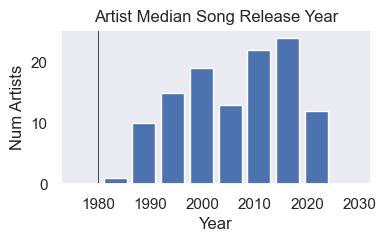

In [516]:
# Artist year distribution
plt.figure(figsize =(4, 2))
plt.hist(LIB['Year'].values, range=[1975,2030], bins = 10, rwidth=0.8)
plt.title("Artist Median Song Release Year")
plt.xlabel("Year")
plt.grid(False)
plt.axvline(x=1980, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.ylabel("Num Artists")
plt.savefig("artist_years_plot.png")
plt.show()

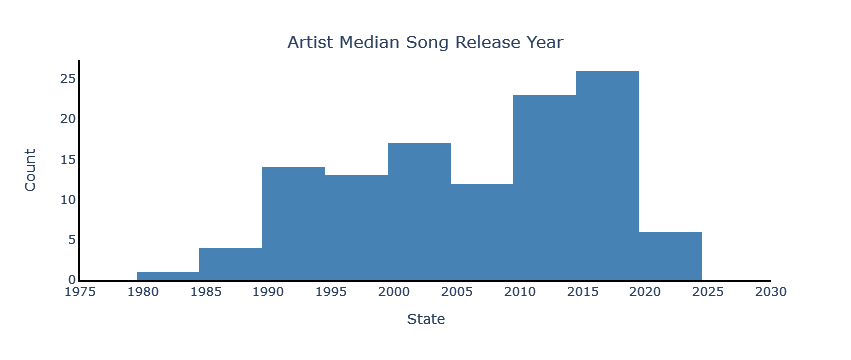

In [517]:
import plotly.express as px
import pandas as pd

# create DataFrame
df = pd.DataFrame({'Year': LIB['Year']})

# create histogram using Plotly
fig = px.histogram(df, x='Year', nbins=10, range_x=[1975, 2030],color_discrete_sequence=['steelblue'])

# update layout
fig.update_layout(title={
        'text': "Artist Median Song Release Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State",
        yaxis_title="Count",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        dtick=5
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ),
        showlegend=False)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}
# display plot
fig.show()

In [518]:
State_df = LIB.agg('State').value_counts().to_frame()

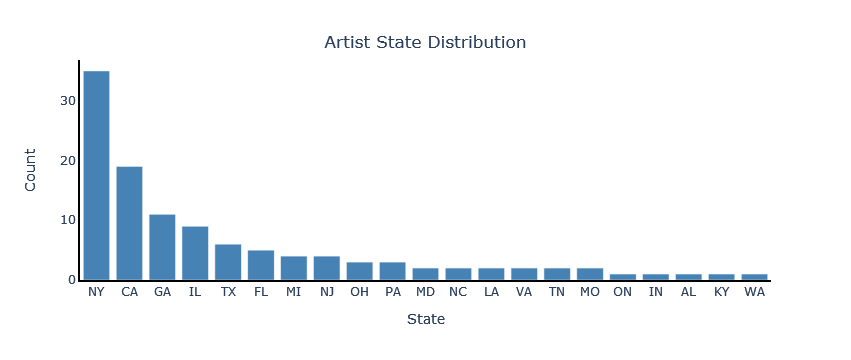

In [519]:
# Plot the state dist
fig = px.bar(State_df,color_discrete_sequence=['steelblue'])
fig.update_traces(textposition='outside', textfont=dict(size=8),
                  textfont_color='black')
fig.update_layout(title={
        'text': "Artist State Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State",
        yaxis_title="Count",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ),
        showlegend=False)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

In [520]:
# Plot the state dist
old_timers = LIB[LIB['Year'] <= 2000]
State_old_df = old_timers.agg('State').value_counts().to_frame()

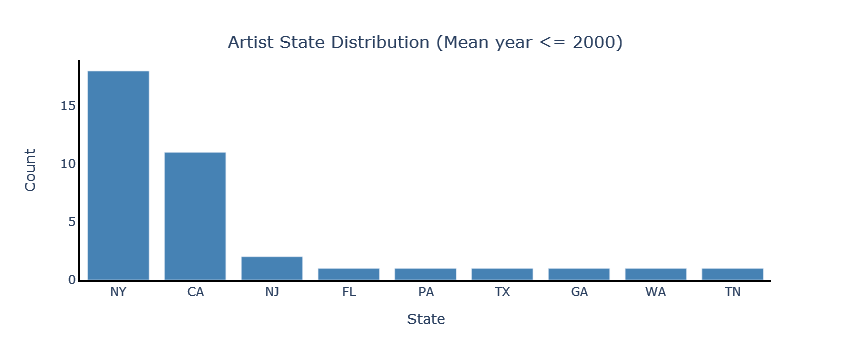

In [521]:
# Plot the state dist
fig = px.bar(State_old_df,color_discrete_sequence=['steelblue'])
fig.update_traces(textposition='outside', textfont=dict(size=8),
                  textfont_color='black')
fig.update_layout(title={
        'text': "Artist State Distribution (Mean year <= 2000)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State",
        yaxis_title="Count",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ),
        showlegend=False)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

Lyrics are the topic of analysis so we should filter out songs without many lyrics

- You should use at least 1,000 documents in each topic modeling job.
- Each document should be at least 3 sentences long.  
https://docs.aws.amazon.com/comprehend/latest/dg/topic-modeling.html
  
Songs Lyrics tend to be all over the place in terms of depth, repetiveness, and all sorts of language mayhem that may make analyze difficult, so I'm filtering out songs with less than 1,000 characters (~140-250 words)

Also, The lyrics at the high end tail of lyric length are misc. full dicographies, freestyles, ted talks, interludes, etc.
- Filtering out all songs with len(lyrics) > 10,000

In [522]:
# look at songs with the longest lyrics
FULL_CORPUS['Lyrics'].str.len().sort_values(ascending=False).head(5)

Artist             Album                      Song                                               
Juice WRLD         Tim Westwood I Freestyles  Tim Westwood Freestyle                                 56516
Chance the Rapper  NA (single)                2016 Beats 1 Interview with Zane Lowe                  52743
Juice WRLD         Tim Westwood I Freestyles  Juice WRLD Hour Freestyle of Fire Over Eminem Beats    44786
Lil Wayne          NA (single)                10,000 Bars                                            31213
Logic              NA (single)                Everybody Documentary                                  27266
Name: Lyrics, dtype: int64

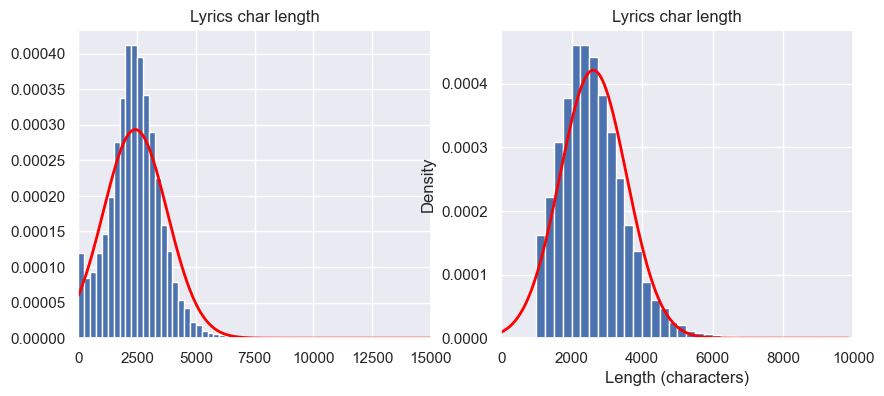

In [523]:
from scipy.stats import norm

data = FULL_CORPUS['Lyrics'].str.len()

bins = range(min(data), max(data) + 250, 250)

# Fit a normal distribution to the histogram
mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 500)
pdf = norm.pdf(x, mu, std)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(data, bins=bins, density=True)
axs[0].plot(x, pdf, color='red', linewidth=2)
axs[0].set_title("Lyrics char length")
axs[0].set_xlim(0,15000)

# Drop songs with lyrics of length less than 1000 characters.  
CORPUS = FULL_CORPUS[FULL_CORPUS['Lyrics'].str.len() > 1000]
# Drop songs wih > 10,000 charecters
CORPUS = CORPUS[CORPUS['Lyrics'].str.len() < 10000]
data1 = CORPUS['Lyrics'].str.len()

mu1, std1 = norm.fit(data1)
x1 = np.linspace(0, max(data1), 500)
pdf1 = norm.pdf(x1, mu1, std1)

axs[1].hist(data1, bins=bins, density=True)
axs[1].plot(x1, pdf1, color='red', linewidth=2)
axs[1].set_title("Lyrics char length")
axs[1].set_xlim(0, 10000)
axs[1].set_xlabel("Length (characters)")
axs[1].set_ylabel("Density")
plt.show()

In [524]:
print(f'Mean song length (char) {data1.mean()} \n Standard dev: {data1.std()}') 

Mean song length (char) 2614.22429064705 
 Standard dev: 947.4635338468923


In [525]:
print(f'Percent of songs kept in COPRUS: {len(CORPUS)/len(FULL_CORPUS)}')

Percent of songs kept in COPRUS: 0.8942940255090625


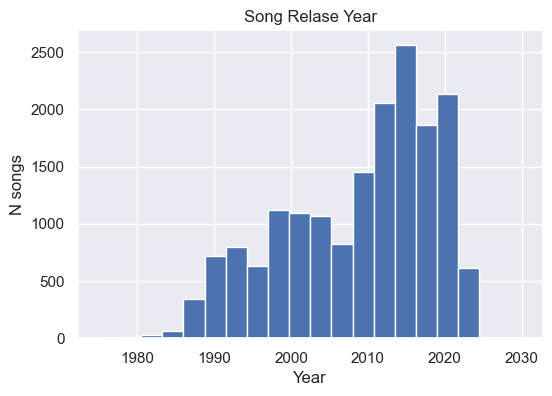

In [526]:
# Release year distribution
plt.figure(figsize =(6, 4))
plt.hist(CORPUS['Year'], range=[1975,2030], bins = 20)
plt.title("Song Relase Year")
plt.xlabel("Year")
plt.ylabel("N songs")
plt.show()

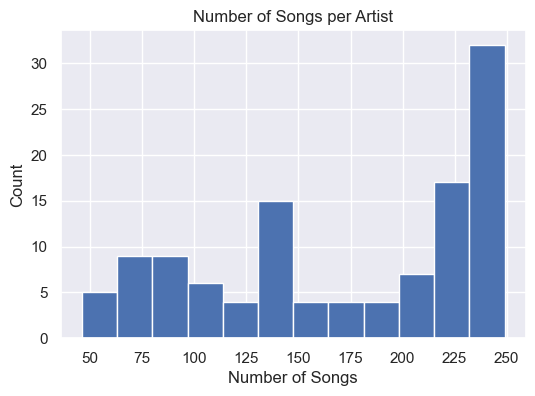

In [527]:
# Release year distribution
plt.figure(figsize =(6, 4))
plt.hist(CORPUS.groupby('Artist').count()['Lyrics'], bins = 12)
plt.title("Number of Songs per Artist")
plt.xlabel("Number of Songs")
plt.ylabel("Count")
plt.show()

In [528]:
print(f'Number songs in FULL_DF: {len(FULL_CORPUS)}')
print(f'Number artists in FULL_DF: {len(FULL_CORPUS.groupby("Artist").count())}')
print(f'Number songs in CORPUS: {len(CORPUS)}')
print(f'Number artists in CORPUS: {len(CORPUS.groupby("Artist").count())}')

Number songs in FULL_DF: 22345
Number artists in FULL_DF: 116
Number songs in CORPUS: 19983
Number artists in CORPUS: 116


In [529]:
# Eliminate years that dont make sense
CORPUS.loc[CORPUS['Year'] < 1970, 'Year'] = pd.NaT

# Create TOKENS DF

In [71]:
def gather(df, ohco_level):
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = df.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df

In [72]:
OHCO = ['Artist', 'Album', 'Song', 'Token']

In [73]:
token_pat = r"[\s',-]+"
TOKENS = CORPUS['Lyrics'].str.split(token_pat, expand=True).stack()\
    .to_frame('token_str')
TOKENS.index.names = OHCO

In [74]:
SONGS = gather(TOKENS, 3)

In [75]:
ARTISTS = gather(TOKENS, 1)

In [76]:
ALBUMS = gather(TOKENS, 2)

In [77]:
TOKENS = SONGS.Song_str\
        .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
        .stack()\
        .to_frame('pos_tuple')

In [78]:
TOKENS.index.names = OHCO

In [79]:
TOKENS['pos'] = TOKENS.pos_tuple.apply(lambda x: x[1])
TOKENS['token_str'] = TOKENS.pos_tuple.apply(lambda x: x[0])
TOKENS['term_str'] = TOKENS.token_str.str.lower()

In [80]:
TOKENS.sample(5)

pos_tuple  \
Artist           Album                                         Song           Token                  
DMX              Walk With Me Now and You’ll Fly With Me Later Where You Been 97      (least, JJS)   
Ghostface Killah Ironman                                       Winter Warz    40     (through, IN)   
The Game         Blood Dreams                                  Money          498          (i, NN)   
DMX              Undisputed                                    Fire           62       (clown, JJ)   
Polo G           NA (single)                                   Evergreen      337         (on, IN)   

                                                                                     pos  \
Artist           Album                                         Song           Token        
DMX              Walk With Me Now and You’ll Fly With Me Later Where You Been 97     JJS   
Ghostface Killah Ironman                                       Winter Warz    40      IN   
The Game         Blood Dreams                                  Money          498     NN   
DMX              Undisputed                                    Fire           62      JJ   
Polo G           NA (single)                                   Evergreen      337     IN   

                                                                                    token_str  \
Artist           Album                                         Song           Token             
DMX              Walk With Me Now and You’ll Fly With Me Later Where You Been 97        least   
Ghostface Killah Ironman                                       Winter Warz    40      through   
The Game         Blood Dreams                                  Money          498           i   
DMX              Undisputed                                    Fire           62        clown   
Polo G           NA (single)                                   Evergreen      337          on   

                                                                                    term_str  
Artist           Album                                         Song           Token           
DMX              Walk With Me Now and You’ll Fly With Me Later Where You Been 97       least  
Ghostface Killah Ironman                                       Winter Warz    40     through  
The Game         Blood Dreams                                  Money          498          i  
DMX              Undisputed                                    Fire           62       clown  
Polo G           NA (single)                                   Evergreen      337         on

# Create VOCAB DF

In [81]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['n_chars'] = VOCAB.index.str.len()
# Add max part pof speech
VOCAB['max_pos'] = TOKENS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

In [82]:
VOCAB.sample(5)

n             p          i  n_chars max_pos
term_str                                                 
cizallll      5  4.602578e-07  21.051054        8      NN
abhorrent     1  9.205157e-08  23.372982        9      NN
hooold        1  9.205157e-08  23.372982        6     VBP
jazze        19  1.748980e-06  19.125055        5      NN
barricading   2  1.841031e-07  22.372982       11     VBG

# TF-IDF

In [83]:
Songs = OHCO[:3]
Albums = OHCO[:2]
Artists = OHCO[:1]

In [84]:
def create_bow(corpus, bag, item_type='term_str'):
    BOW = corpus.groupby(bag+[item_type])[item_type].count().to_frame('n')
    return BOW

In [85]:
def get_tfidf(bow):
    
    # Create Doc-Term Count Matrix
    DTCM = bow.n.unstack(fill_value=0) 

    TF = (DTCM.T / DTCM.T.sum()).T # Term frequency
    DF = DTCM.astype('bool').sum() # Document frequency
    N_docs = len(DTCM)
    
    IDF = np.log2(N_docs/DF)
    
    TFIDF = TF * IDF

    return TFIDF

In [86]:
# Doc level = songs
BOW_songs = create_bow(TOKENS, bag = Songs)
TFIDF_SONGS = get_tfidf(BOW_songs)

In [87]:
# Doc level = songs
BOW_artists = create_bow(TOKENS, bag = Artists)
TFIDF_ARTISTS = get_tfidf(BOW_artists)

In [88]:
BOW_songs.head()

n
Artist      Album                          Song         term_str    
2 Live Crew As Clean as They Wanna Be (LP) City of Boom a         11
                                                        about      1
                                                        addition   6
                                                        aint       3
                                                        all        2

In [89]:
TFIDF_SONGS.head()

term_str                                                            a   aa  \
Artist      Album                          Song                              
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000356  0.0   
                                           The Funk Shop     0.000256  0.0   
                                           You Got Larceny   0.000388  0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000457  0.0   
                                           Break it on Down  0.000336  0.0   

term_str                                                     aaa  aaaaa  \
Artist      Album                          Song                           
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.0    0.0   
                                           The Funk Shop     0.0    0.0   
                                           You Got Larceny   0.0    0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.0    0.0   
                                           Break it on Down  0.0    0.0   

term_str                                                     aaaaaaa  \
Artist      Album                          Song                        
2 Live Crew As Clean as They Wanna Be (LP) City of Boom          0.0   
                                           The Funk Shop         0.0   
                                           You Got Larceny       0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch         0.0   
                                           Break it on Down      0.0   

term_str                                                     aaaaaaaaaaaaa  \
Artist      Album                          Song                              
2 Live Crew As Clean as They Wanna Be (LP) City of Boom                0.0   
                                           The Funk Shop               0.0   
                                           You Got Larceny             0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch               0.0   
                                           Break it on Down            0.0   

term_str                                                     aaaaaaaaaaaaaa  \
Artist      Album                          Song                               
2 Live Crew As Clean as They Wanna Be (LP) City of Boom                 0.0   
                                           The Funk Shop                0.0   
                                           You Got Larceny              0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch                0.0   
                                           Break it on Down             0.0   

term_str                                                     aaaaaaaaaaaaaaah  \
Artist      Album                          Song                                 
2 Live Crew As Clean as They Wanna Be (LP) City of Boom                   0.0   
                                           The Funk Shop                  0.0   
                                           You Got Larceny                0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch                  0.0   
                                           Break it on Down               0.0   

term_str                                                     aaaaaaaall  \
Artist      Album                          Song                           
2 Live Crew As Clean as They Wanna Be (LP) City of Boom             0.0   
                                           The Funk Shop            0.0   
                                           You Got Larceny          0.0   
            As Nasty as They Wanna Be      Bad Ass Bitch            0.0   
                                           Break it on Down         0.0   

term_str                                                     aaaaaaaay  ...  \
Artist      Album                          Song                         ...   
2 Live Crew As Clean as They Wanna Be (LP) City of Boom            0.

In [90]:
# Doc level = artist
BOW_artists = create_bow(TOKENS, bag = Artists)

# Doc level = albums
BOW_albums = create_bow(TOKENS, bag = Albums)
TFIDF_ALBUMS = get_tfidf(BOW_albums)

In [91]:
# Apply TFIDF aggregates to VOCAB
VOCAB['tfidf_mean'] = TFIDF_SONGS.mean() 
VOCAB['tfidf_sum'] = TFIDF_SONGS.sum()
VOCAB['tfidf_max'] = TFIDF_SONGS.max()

# Artist vocab by year

In [92]:
# Artist level TF-IDF metric
ARTISTS['TF-IDF_metric'] = TFIDF_SONGS.mean(axis=1).groupby('Artist').mean()
# Artist year
ARTISTS['Year'] = LIB.Year

In [93]:
fig = px.scatter(ARTISTS.reset_index(), 'Year', 'TF-IDF_metric', hover_name='Artist',
                 title= "Aggregated Artist TF-IDF Metric by Year", trendline="ols",
                 text='Artist')
fig.update_traces(textposition='top center', textfont=dict(size=8),
                  textfont_color='black', line=dict(width=10, color='cadetblue'))
fig.update_layout(title={
        'text': "Aggregated Artist TF-IDF metric by Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="TF-IDF Metric",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

In [94]:
# Unique words per song by artist
unique_words = TOKENS.groupby('Song').nunique()['term_str']
unique_words.name = 'unique_words'

In [95]:
SONGS= SONGS.reset_index().set_index('Song').merge(unique_words, on='Song').\
            reset_index().set_index(Songs)

In [96]:
avg_unq_words_per_song = SONGS.groupby('Artist').mean()
ARTISTS['Avg_unique_words'] = avg_unq_words_per_song


In [97]:
fig = px.scatter(ARTISTS.reset_index(), 'Year', 'Avg_unique_words', hover_name='Artist',
                 title= "Average Unique Words per Song", text = 'Artist', trendline="ols")
fig.update_traces(textposition='top center', textfont=dict(size=8),
                  textfont_color='black', line=dict(width=10, color='cadetblue'))

fig.update_traces(textposition='top center', textfont=dict(size=8))
fig.update_layout(title={
        'text': "Artist Average Unique Words per Song by Year",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="Average Unique Words per Song",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

In [98]:
# Calculate average song length by year for each artist
avg_song_len = TOKENS.groupby(['Artist','Album','Song']).count().groupby('Artist')['term_str'].mean()
ARTISTS['Avg_song_len'] = avg_song_len.values

In [99]:
# Create the scatter plot with trendline for avg song len
fig = px.scatter(ARTISTS.reset_index(), x='Year', y='Avg_song_len', trendline="ols", text='Artist', 
                 hover_name='Artist', title="Artist Average Song Lyric Length")
fig.update_traces(textposition='top center', textfont=dict(size=8),
                  textfont_color='black', line=dict(width=10, color='cadetblue'))

fig.update_layout(title={
        'text': "Artist Average Song Length by Year",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="Average Song Length",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

In [100]:
# Create uniqueness metric adjusted for song length
ARTISTS['Avg_Unq / Avg_len'] = ARTISTS.Avg_unique_words / ARTISTS.Avg_song_len

In [101]:
# Create the scatter plot with trendline for unique words / avg song len 
fig = px.scatter(ARTISTS.reset_index(), x='Year', y='Avg_Unq / Avg_len', trendline="ols", text='Artist', 
                 hover_name='Artist', title="Artist Avg Unique Words Adjusted by Song Length")
fig.update_traces(textposition='top center', textfont=dict(size=8),
                  textfont_color='black', line=dict(width=10, color='cadetblue'))

fig.update_layout(title={
        'text': "Artist Avgerage Unique Words (Adjusted by Song Length) by Year",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="Average Unique Word Ratio per Song ",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

### TF-IDF at artist level

In [102]:
TFIDF_artist_score = TFIDF_ARTISTS.mean(axis=1).to_frame('tfidf')
TFIDF_artist_score['Year'] = LIB.Year

In [103]:
fig = px.scatter(TFIDF_artist_score.reset_index(), 'Year', 'tfidf', hover_name='Artist',
                 title= "Aggregated Artist TF-IDF Metric by Year", trendline="ols",
                 text='Artist')
fig.update_traces(textposition='top center', textfont=dict(size=8),
                  textfont_color='black', line=dict(width=10, color='cadetblue'))
fig.update_layout(title={
        'text': "Artist-Level TF-IDF by Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="TF-IDF Metric",
        plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2,
        
    ),
    yaxis=dict(
        zeroline=True,
        linecolor='black',
        linewidth=2
    ))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 900,
    'scale':5# Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)

# PCA

### Data Prep

In [104]:
# reduce the feature space of the the TFIDF table by selecting the top 5000 significant nouns, verbs, and adjectives.
VSHORT = VOCAB[VOCAB.max_pos.str.fullmatch(r"(NN|NNS|VB|VBD|VBG|VBN|VBP|VBZ|JJ)")].sort_values('tfidf_mean', ascending=False).head(8000)

TFIDF_reduced = TFIDF_SONGS[VSHORT.index]

In [105]:
### Normalize doc vector lengths
# We use L2 normalization, which scales documents by their pythagorean (Euclidean) length.
TFIDF_L2 = (TFIDF_reduced.T / np.sqrt(np.square(TFIDF_reduced).sum(axis=1))).T

# Center the term vectors
TFIDF_L2 = TFIDF_L2 - TFIDF_L2.mean()

# Compute Covariance Matrix
#COV = TFIDF_L2.T.dot(TFIDF_L2) / (TFIDF_L2.shape[0] - 1)
COV = TFIDF_L2.cov()

In [106]:
COV.head()

term_str      yeah      baby      love        oh        ya        yo  \
term_str                                                               
yeah      0.001616  0.000092  0.000052  0.000205 -0.000039 -0.000053   
baby      0.000092  0.001583  0.000180  0.000113  0.000010 -0.000029   
love      0.000052  0.000180  0.001572  0.000073 -0.000021 -0.000048   
oh        0.000205  0.000113  0.000073  0.001922 -0.000031 -0.000039   
ya       -0.000039  0.000010 -0.000021 -0.000031  0.001646  0.000128   

term_str       ayy        uh     money        em  ...      colossal  \
term_str                                          ...                 
yeah      0.000215  0.000197  0.000053 -0.000005  ... -1.002808e-06   
baby      0.000041  0.000024 -0.000020 -0.000034  ... -3.210328e-07   
love      0.000012  0.000004 -0.000014 -0.000035  ...  1.789346e-06   
oh       -0.000016  0.000065 -0.000029 -0.000035  ...  2.145771e-06   
ya       -0.000087 -0.000017 -0.000015  0.000056  ...  1.938134e-07   

term_str        thugga     mannequin        grades        erased  \
term_str                                                           
yeah      1.298482e-06 -1.733773e-06  2.199070e-07 -5.330163e-08   
baby      7.354838e-06  1.311825e-07 -1.420619e-06 -1.693514e-06   
love     -1.287532e-06  1.473252e-07  6.772723e-07  3.502789e-07   
oh       -9.407261e-07 -8.326358e-07 -4.594225e-07 -5.618919e-07   
ya       -4.165838e-07  8.319798e-09 -2.160473e-06  5.673119e-07   

term_str         karat          cans       splurge  mastermind          rely  
term_str                                                                      
yeah      4.053217e-07 -1.466852e-06  2.362896e-07   -0.000001 -3.024472e-07  
baby     -3.941068e-07 -6.875563e-07 -4.120305e-07   -0.000001 -1.549548e-06  
love      6.019714e-07  5.299308e-07 -4.185064e-07   -0.000002  2.907809e-07  
oh       -1.091499e-06  1.103625e-06 -8.015736e-07   -0.000002 -6.410777e-07  
ya       -1.022904e-06 -7.991003e-07 -1.228867e-06    0.000001 -1.012679e-06  

[5 rows x 8000 columns]

In [107]:
eig_vals, eig_vecs = eigh(COV)

In [108]:
# Convert eigen data to dataframes
EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
EIG_VAL.index.name = 'term_str'

# Explore Term Pairs
EIG_VEC_PAIRS = EIG_VEC.stack().sort_values(ascending=False).to_frame('covariance')
EIG_VEC_PAIRS.index.names = ['term1', 'term2']

### Select Principal Components

Next, we associate each eigenvalue with its corresponding *column* in the eigenvalue matrix. \
This is why we transpose the `EIG_VEC` dataframe.

In [109]:
# Combine eigenvalues and eignvectors
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
# compute variance
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)

COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(20).reset_index(drop=True)
COMPS.index.name = 'comp_id'
COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
COMPS.index.name = 'pc_id'

In [110]:
COMPS.head()

eig_val      yeah      baby      love        oh        ya        yo  \
pc_id                                                                         
PC0    0.004215 -0.162697 -0.049925  0.029058 -0.049919  0.133893  0.133248   
PC1    0.003609 -0.194722 -0.210947 -0.248578 -0.200101  0.079837  0.100638   
PC2    0.003159  0.071252 -0.095972 -0.113243 -0.199435  0.111296  0.096621   
PC3    0.002722 -0.092537 -0.297551 -0.049127 -0.139687 -0.284647 -0.182272   
PC4    0.002538  0.041523 -0.089924 -0.043879  0.007447  0.010919  0.067381   

            ayy        uh     money  ...    thugga  mannequin    grades  \
pc_id                                ...                                  
PC0   -0.396224 -0.113653 -0.041339  ... -0.002151  -0.000861  0.001361   
PC1   -0.158912 -0.115994 -0.035376  ... -0.000861   0.000398 -0.001638   
PC2    0.268497  0.044124  0.151837  ...  0.001366   0.001116  0.000900   
PC3   -0.017059 -0.069061  0.009128  ... -0.000800   0.000711  0.002043   
PC4    0.701097  0.240903 -0.117990  ... -0.003225   0.000260  0.000183   

         erased     karat      cans   splurge  mastermind      rely  exp_var  
pc_id                                                                         
PC0    0.001404 -0.000244  0.000546 -0.001173    0.002054  0.001857     0.43  
PC1   -0.000212 -0.000035  0.000193 -0.001139    0.001226  0.000523     0.37  
PC2   -0.000069  0.001300  0.001021  0.000847    0.000865 -0.000070     0.32  
PC3    0.000509 -0.000015  0.000715 -0.000749    0.000491  0.001181     0.28  
PC4    0.002080 -0.001298  0.001002 -0.001891    0.001355  0.000627     0.26  

[5 rows x 8002 columns]

### See Projected Components onto Vocabulary (Loadings)

Loadings shows the contribution of each term to the component. 
We'll just look at the top 10 words for the first two components in the Album version.

In [111]:
LOADINGS = COMPS[COV.index].T
LOADINGS.index.name = 'term_str'

In [112]:
LOADINGS.head(10)

pc_id          PC0       PC1       PC2       PC3       PC4       PC5  \
term_str                                                               
yeah     -0.162697 -0.194722  0.071252 -0.092537  0.041523 -0.240384   
baby     -0.049925 -0.210947 -0.095972 -0.297551 -0.089924  0.093244   
love      0.029058 -0.248578 -0.113243 -0.049127 -0.043879  0.115810   
oh       -0.049919 -0.200101 -0.199435 -0.139687  0.007447 -0.240936   
ya        0.133893  0.079837  0.111296 -0.284647  0.010919  0.005430   
yo        0.133248  0.100638  0.096621 -0.182272  0.067381 -0.019551   
ayy      -0.396224 -0.158912  0.268497 -0.017059  0.701097  0.394532   
uh       -0.113653 -0.115994  0.044124 -0.069061  0.240903 -0.754739   
money    -0.041339 -0.035376  0.151837  0.009128 -0.117990  0.012606   
em        0.041787  0.006237  0.136899 -0.022967 -0.011698 -0.022197   

pc_id          PC6       PC7       PC8       PC9      PC10      PC11  \
term_str                                                               
yeah     -0.114007  0.211501  0.083045 -0.189754  0.170550  0.052595   
baby      0.041195 -0.075440  0.131918  0.041593  0.271808 -0.023239   
love      0.011519 -0.239070  0.098700 -0.024525  0.101536 -0.207989   
oh       -0.484301  0.360094 -0.489265 -0.079131 -0.133796 -0.197667   
ya       -0.188682 -0.268048 -0.137450  0.099793  0.040302 -0.102753   
yo       -0.032017  0.021436 -0.007384 -0.027607 -0.132514 -0.020330   
ayy      -0.019119 -0.092396 -0.179621  0.052083 -0.043800 -0.013108   
uh        0.351446 -0.325422 -0.050297  0.103108 -0.078323 -0.072031   
money     0.098291  0.108592 -0.060797  0.005945 -0.040789  0.159663   
em       -0.064330  0.009018  0.036270 -0.005733  0.060691 -0.004151   

pc_id         PC12      PC13      PC14      PC15      PC16      PC17  \
term_str                                                               
yeah      0.243278  0.023150 -0.122717  0.157566  0.555353 -0.101572   
baby     -0.202755  0.010570  0.020650 -0.281088 -0.170948  0.098380   
love      0.100983 -0.377121 -0.419848 -0.152197  0.103906 -0.408927   
oh       -0.198846 -0.134541 -0.048820  0.012333 -0.143700  0.006831   
ya        0.324406  0.361528 -0.208604  0.432542 -0.096030  0.015702   
yo        0.028332  0.016112 -0.055890 -0.315161  0.295577  0.160908   
ayy      -0.026538 -0.091448  0.060145  0.026115  0.026579  0.054449   
uh       -0.033300 -0.029420  0.070033 -0.009214 -0.127276 -0.036818   
money     0.085057 -0.216614 -0.137940  0.163218 -0.078866  0.191919   
em       -0.041315  0.020685  0.005895 -0.001265 -0.091331 -0.013608   

pc_id         PC18      PC19  
term_str                      
yeah      0.197376 -0.234569  
baby      0.527249  0.161824  
love     -0.219811  0.189715  
oh       -0.059761  0.112548  
ya        0.126091  0.216302  
yo       -0.019388  0.131748  
ayy       0.006398  0.032477  
uh       -0.021048  0.044739  
money     0.003642  0.234853  
em       -0.059626 -0.060034

### Project Docs onto Components

We get the dot product of the DTM matrix and the new component matrix, which we will call DCM -- for document-component matrix. \
This has the effect of replacing the features of the DTM with the features of the transposed component matrix.

In [113]:
# We use the index to get only PCA features, so matrices align
DCM = TFIDF_L2.dot(COMPS[COV.index].T) 

In [114]:
df1 = CORPUS.groupby(Songs)\
    .Region.apply(lambda x: x )\
    .to_frame("Region")

In [115]:
SONGS = gather(TOKENS,3)

In [116]:
SONGS = SONGS.join(df1, on=Songs)

In [117]:
DCM = DCM.join(SONGS)

## PCA Similarity

In [118]:
X = DCM[COMPS.index].groupby('Artist').mean()

In [119]:
year = LIB.Year.values
reg = LIB.State.values

In [120]:
X.index = X.index +'- ' + reg + '-  ' + year.astype(str)

In [121]:
SIMS = pdist(normalize(X, norm='l2'), metric='cosine')
TREE =sch.linkage(SIMS, method='ward') 

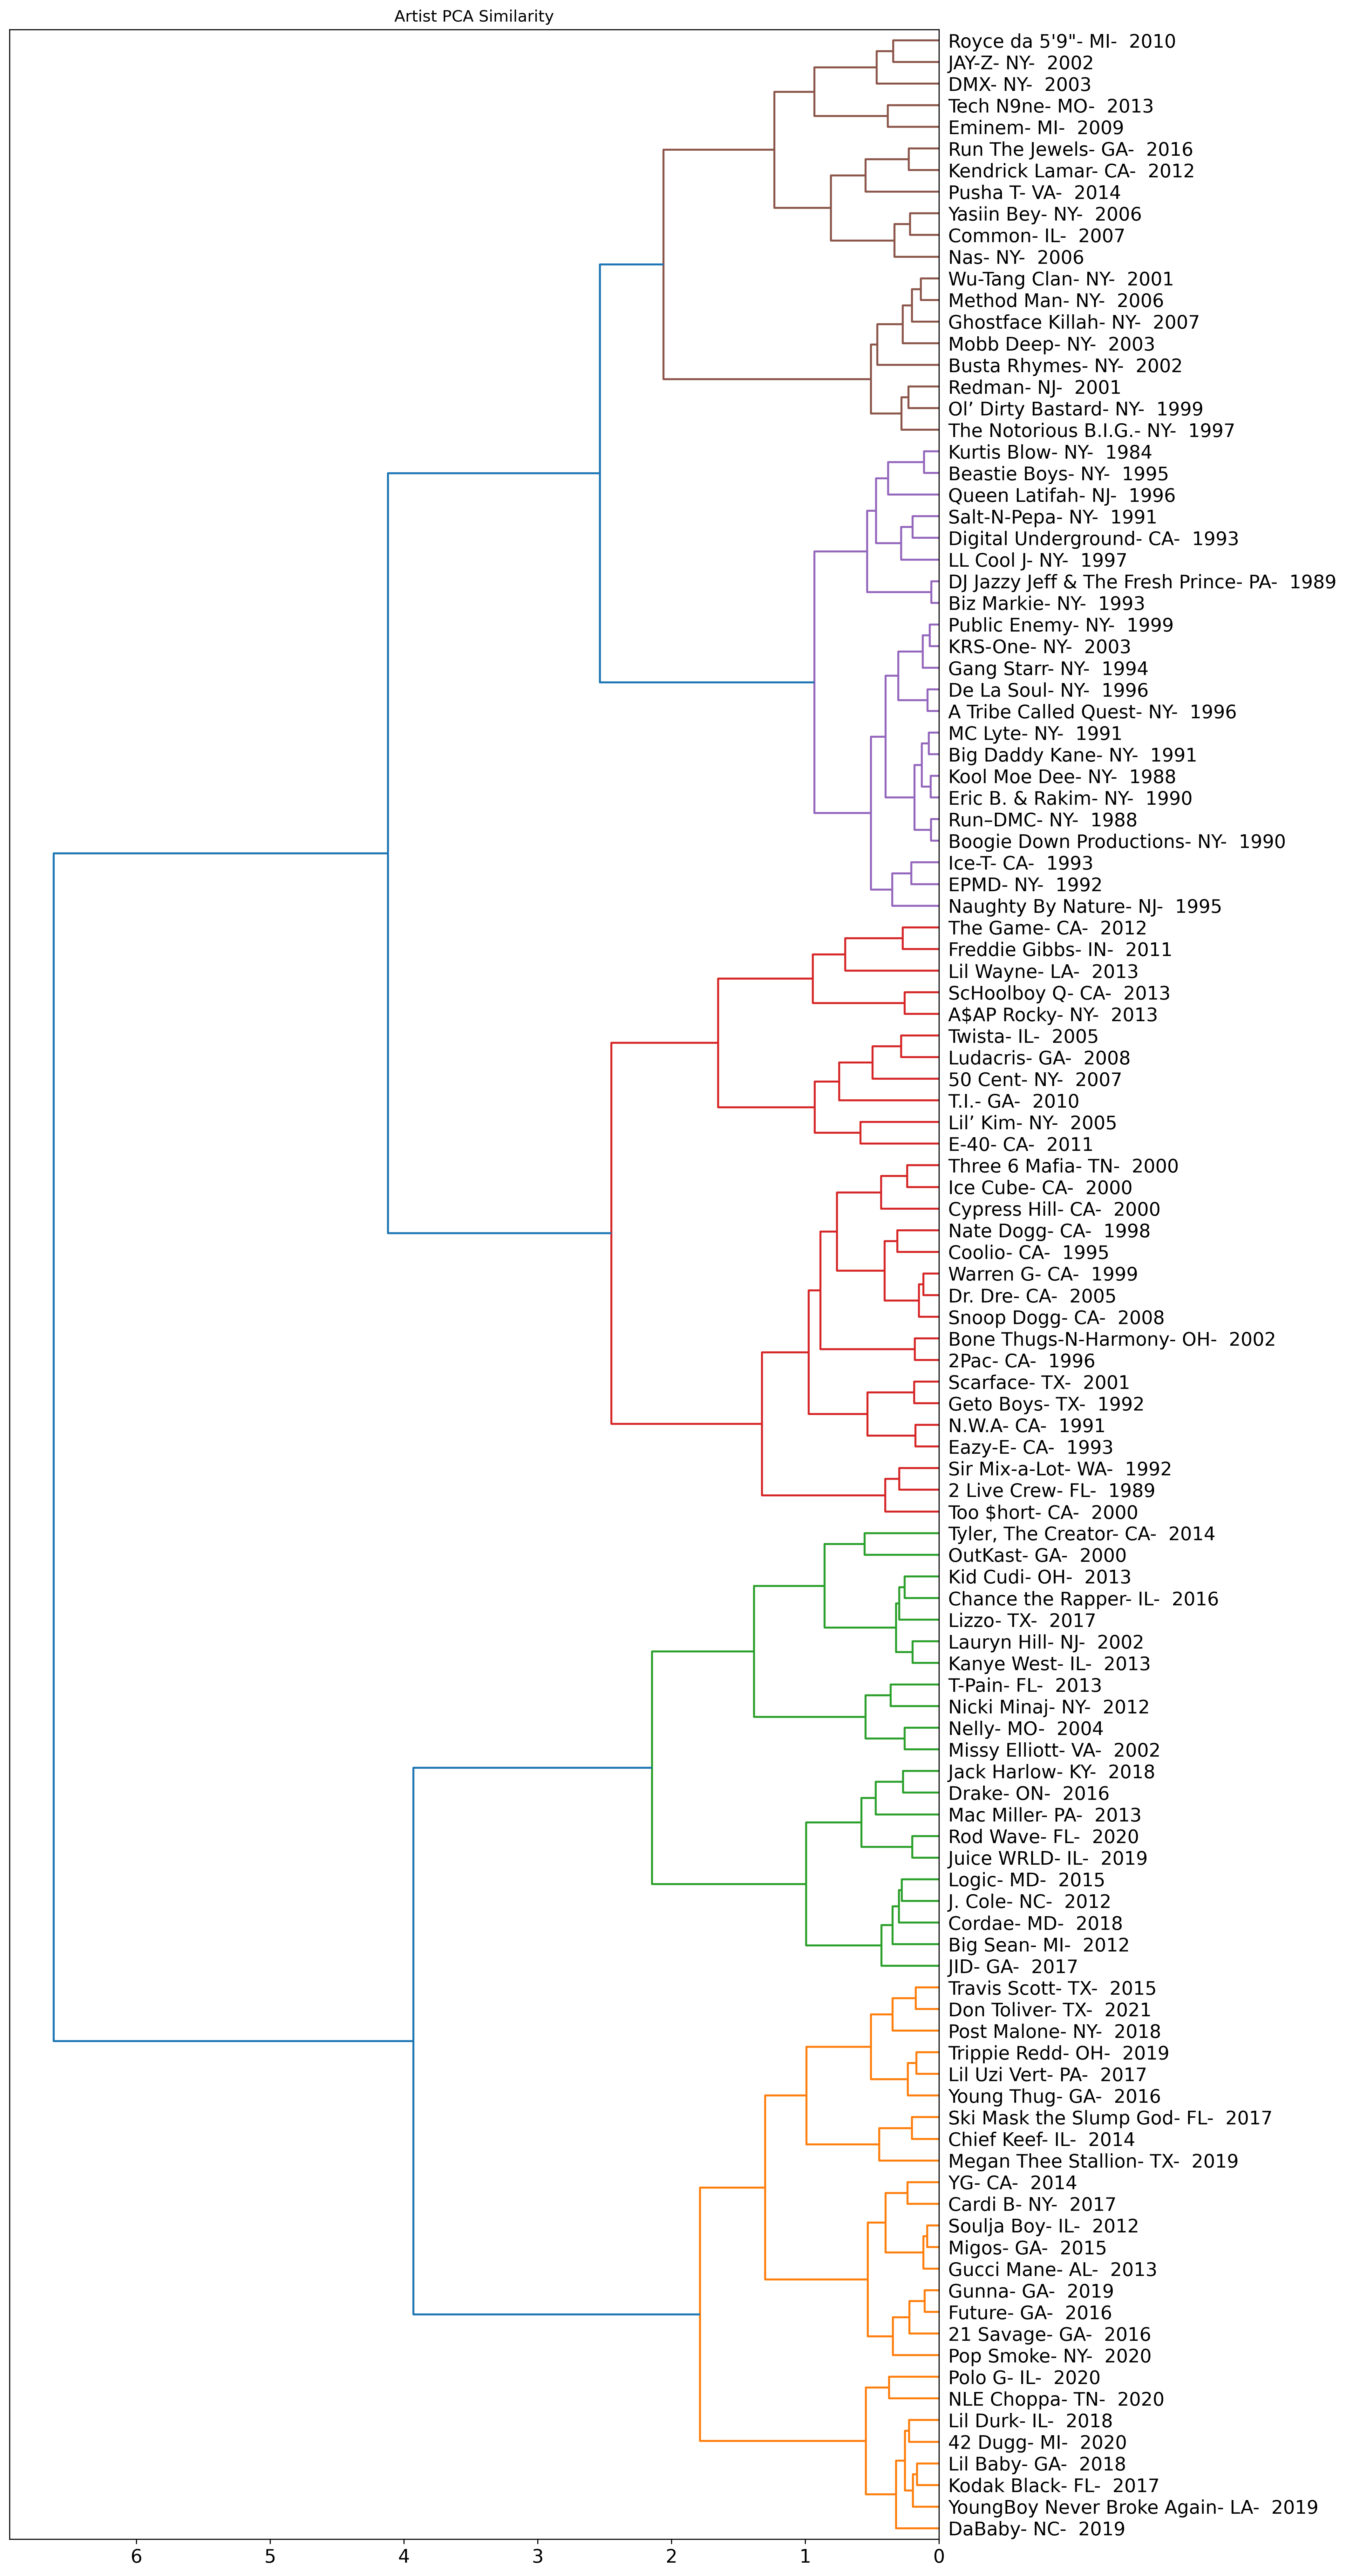

In [122]:
plt.figure(figsize=(15, 28), dpi=300)
dendrogram = sch.dendrogram(TREE, labels=X.index.tolist(), orientation='left',color_threshold=2.5)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.subplots_adjust(left=0.05, right=.7, top=0.97, bottom=0.03)
plt.title('Artist PCA Similarity')
plt.savefig("images/PCA_dendrogram.png")

# Topic Models

## LDA with songs as docs

In [337]:
n_terms = 10000
n_topics = 20
max_iter = 50
n_top_terms = 15

In [338]:
BAG = Songs
# Words that are too common, dont mean much, and showed up too often in the LDA topics
w = ['im', 'woah', 'woah woah', 'thats', 'thats thats', 'ah', 'lets', 'hes','let','oh','waoh', 'whats', 'yea',
    'ha', 'hey', 'ho', 'ya','yeah', 'ha ha', 'haha', 'lot', 'em', 'la', 'ahh', 'yo',
    'yoyo', 'yo yo', 'na', 'nah','uh','huh', 'th', 'ft', 'ay', 'ooh', 'ohh']

In [339]:
DOCS_songs = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(BAG).term_str\
    .apply(lambda x: ' '.join([word for word in x if word.lower() not in w]))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [340]:
DOCS_songs

doc_str
Artist                     Album                          Song                                                               
2 Live Crew                As Clean as They Wanna Be (LP) City of Boom      citycitycity boom bowchihbowbow citycitycity b...
                                                          The Funk Shop     i place streets ask questions sheets funk shop...
                                                          You Got Larceny   verse brother marquis talk rumors fact respons...
                           As Nasty as They Wanna Be      Bad Ass Bitch     ba ba breakdowns crew encounters words theres ...
                                                          Break it on Down  verse brother marquis story mama get thanks at...
...                                                                                                                       ...
YoungBoy Never Broke Again Until I Return                 Chopper City      draco thirty fifty city look walk felony gang ...
                                                          Emotional Torn    mmmmm mmhmm mmmmm prayers one i brother backbo...
                                                          Top Say           cook kiddfreddo i dream i brace something some...
                                                          Toxic             count embers i afford hellcat press record i c...
                                                          Whitey Bulger     i laury hello laury dubbaaa woo i murder i i b...

[19983 rows x 1 columns]

### Create Vector Space

We use Scikit Learn's CountVectorizer to convert our F1 corpus of songs into a document-term vector space of word counts.

In [341]:
count_engine = CountVectorizer(max_features=n_terms, stop_words='english')
count_model = count_engine.fit_transform(DOCS_songs.doc_str)
TERMS = count_engine.get_feature_names_out()

In [342]:
DTM_songs = pd.DataFrame(count_model.toarray(), index=DOCS_songs.index, columns=TERMS)
DOCS_songs['term_count'] = DTM_songs.sum(1)

### Generate Model

In [343]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [344]:
lda_model = lda_engine.fit_transform(count_model)

In [345]:
# Topic Names
TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

### THETA

In [346]:
THETA = pd.DataFrame(lda_model, index=DOCS_songs.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

In [347]:
THETA.head()

T00  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           Break it on Down  0.000610   

                                                                  T01  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.096923   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           Break it on Down  0.000610   

                                                                  T02  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.032312   
                                           Break it on Down  0.000610   

                                                                  T03  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           Break it on Down  0.000610   

                                                                  T04  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.410780   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.115060   
                                           Break it on Down  0.000610   

                                                                  T05  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           Break it on Down  0.000610   

                                                                  T06  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.000694   
                                           You Got Larceny   0.133004   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           Break it on Down  0.000610   

                                                                  T07  \
Artist      Album                          Song                         
2 Live Crew As Clean as They Wanna Be (LP) City of Boom      0.000431   
                                           The Funk Shop     0.114646   
                                           You Got Larceny   0.000769   
            As Nasty as They Wanna Be      Bad Ass Bitch     0.000833   
                                           B

### PHI

In [348]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [349]:
PHI.head()

term_str   aaah        aah       aahh    aaliyah   aap      aaron        ab  \
topic_id                                                                      
T00       45.05   0.050000  34.748018   0.050000  0.05   0.050000  0.050000   
T01        0.05   0.050000   0.050000   0.050000  0.05  16.789699  2.492419   
T02        0.05   0.050000   0.050000   0.050000  0.05   4.367494  0.050000   
T03        0.05   0.050000   0.050000   0.050000  0.05   0.050000  0.050000   
T04        0.05  29.872002   0.050000  15.758948  0.05   4.619601  0.050000   

term_str   abc  ability   abortion  ...     zombie   zombies       zone  \
topic_id                            ...                                   
T00       0.05     0.05   0.050000  ...  28.452686   0.05000  25.923861   
T01       0.05     0.05  17.850918  ...   0.050000   0.05000   0.050000   
T02       0.05     0.05   0.050000  ...   0.050000   0.05000   0.050000   
T03       0.05     0.05   0.050000  ...   0.050000   0.05000   0.050000   
T04       0.05     0.05  25.384074  ...   0.050000  18.27249  81.867276   

term_str  zones  zonin         zoo      zoom  zoop        zs     zulu  
topic_id                                                               
T00        0.05   0.05    0.050000   0.05000  0.05  0.050000  0.05000  
T01        0.05   0.05    0.050000   0.05000  0.05  0.050000  0.05000  
T02        0.05   0.05    0.050000   0.05000  0.05  0.050000  0.05000  
T03        0.05   0.05    5.727366   0.05000  0.05  1.527443  5.07739  
T04        0.05   0.05  131.374756  22.47773  0.05  3.538772  0.05000  

[5 rows x 10000 columns]

### Results 

In [350]:
# Evaluating Model Quality
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_engine.score(count_model))

# Perplexity: Lower the better. Perplexity = exp((-1) * log-likelihood per word)
print("Perplexity: ", lda_engine.perplexity(count_model))

Log Likelihood:  -16434742.029207077
Perplexity:  2069.4590119326504


In [351]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(n_top_terms).reset_index().drop('topic_id', axis=1)['term_str'])

In [352]:
TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:n_top_terms]), 1)
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

In [353]:
TOPICS

term_str         0          1      2        3              4       5  \
topic_id                                                               
T00           aint        gon   dont     mama            lil   tryna   
T01           life        god    day   things           lord  people   
T02             da        wit  hands   bounce            air    club   
T03            pop      smoke    woo   rollin            dem      mi   
T04            man       yall   game     aint            rap     boy   
T05          block       head    gun    shots           face    guns   
T06         people      cause  youre     mind            war    time   
T07       diamonds        bag  wrist    water          racks    trap   
T08           time       dont    way     mind          youre   cause   
T09           love  everybody    dog     wait           face  shawty   
T10          world     ghetto   song  versace        breathe     man   
T11           baby       girl    way    cause          youre   girls   
T12            ayy       gang  gucci    check           damn     boy   
T13          dance    friends   okay   lights           whoa    word   
T14           hoes      party   game     city           club    aint   
T15          cause      youre   time      rap           rock   style   
T16            boy        dre   funk    coast           dogg     cuz   
T17          cause        man    day      way          night    aint   
T18          cause       thug   bone     yall  motherfuckers  murder   
T19          money       cash   dope     aint           hoes    work   

term_str          6        7        8        9         10      11       12  \
topic_id                                                                     
T00             ima    cause     bout    round       baby    play     head   
T01           world     pain      way   family      dream    soul     days   
T02            pass     cmon  gangsta      dat     biggie    jump  trouble   
T03         problem      que     hill  cypress      rider      el       di   
T04            boom     dont     flow  rappers      music   cause     kids   
T05           house     dont     door     shot       beef    body   street   
T06          matter      men      way    peace      brain    look    power   
T07            look     neck      ice    bands      chain    whip     plug   
T08           night    heart     home     love      times     day   things   
T09            dogs   friend     rick     baby        cup    hold    drank   
T10       christmas     jack     feet   riches  president    hype     rise   
T11            dont     body     head     shes      thing     sex      man   
T12            bang     mane     swag      hoe        aye  soulja       mm   
T13            goin  alright   chance     hand      chick    push  fingers   
T14           cause     pimp     drop   player     pimpin   mouth     weed   
T15          rhymes    rhyme     beat   people       yall   music     word   
T16            weed  compton     roll     trip       west   snoop    cause   
T17            life     hood     game  streets       time  street     hell   
T18            bang    thugs     dont       mo      comin   thang     aint   
T19           paper      boy   dollar     bank      cause    dont   gettin   

term_str      13        14                                              label  \
topic_id                                                                        
T00        today    talkin  T00 aint, gon, dont, mama, lil, tryna, ima, ca...   
T01         eyes       sky  T01 life, god, day, things, lord, people, worl...   
T02       boogie     knock  T02 da, wit, hands, bounce, air, club, pass, c...   
T03           te        pa  T03 pop, smoke, woo, rollin, dem, mi, problem,...   
T04        album      time  T04 man, yall, game, aint, rap, boy, boom, don...   
T05        blood      drop  T05 block, head, gun, shots, face, guns, house...   
T06         dont     truth  T06 people, cause, you

In [354]:
TOPICS_table = TOPICS.drop(columns=['label','doc_weight_sum', 'term_freq' ])
TOPICS_table.columns.name = 'Most Relevant Words'
TOPICS_table.index = ['Topic '+x[-2:] for x in TOPICS_table.index]

In [355]:
from pretty_html_table import build_table
pretty_topics_table = build_table(TOPICS_table, 'blue_light', font_size='25px', index=True)

In [356]:
# save table
with open('images/pretty_topics_table.html', 'w') as f:
    f.write(pretty_topics_table)

In [357]:
# Visualizing model by plotting latent themes and the associated words
# pyLDAvis package extracts information from a fitted LDA topic model to inform an interactive web-based visualization

pyLDAvis.enable_notebook()
panel = pyLDAvis.lda_model.prepare(lda_engine, count_model, count_engine, mds='tsne')
panel 

PreparedData(topic_coordinates=               x          y  topics  cluster      Freq
topic                                                 
15    -36.184505 -28.210949       1        1  8.531895
5      46.834145  24.410439       2        1  8.394358
4     -15.861133 -15.172601       3        1  7.667457
8     -12.809414 -45.627865       4        1  7.146431
17    -24.337904  48.958546       5        1  7.133140
19     26.412010 -16.366474       6        1  7.097353
11     34.272942  49.336052       7        1  6.987376
1       5.455883  13.415602       8        1  6.798407
0       5.080166  52.532558       9        1  6.674365
6      -8.532744  30.428854      10        1  6.546432
14     23.139286 -45.815479      11        1  5.993298
7     -37.044003  24.412970      12        1  5.154503
18     28.016933   6.731678      13        1  4.358314
12    -41.295456  -1.440535      14        1  2.283046
16     19.531431  30.104332      15        1  2.168652
9      52.160851  -1.572077      16        1  1.748995
2       5.446328  -6.975639      17        1  1.559481
13      4.992395 -29.418152      18        1  1.417163
10     47.053520 -28.586380      19        1  1.297672
3     -17.382538   7.842120      20        1  1.041662, topic_info=       Term          Freq         Total Category  logprob  loglift
5747  money  21390.000000  21390.000000  Default  30.0000  30.0000
5229   love   9541.000000   9541.000000  Default  29.0000  29.0000
9834  world   8456.000000   8456.000000  Default  28.0000  28.0000
407    baby  14223.000000  14223.000000  Default  27.0000  27.0000
5090   life  15352.000000  15352.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
6535  pills    174.415814    845.260527  Topic20  -4.8564   2.9861
6169  order    154.288852    852.501267  Topic20  -4.9790   2.8550
5281     ma    129.693366    436.905694  Topic20  -5.1526   3.3498
9962    yuh    118.594943    509.356919  Topic20  -5.2421   3.1069
6518  piece    109.369138   1391.860352  Topic20  -5.3231   2.0207

[1517 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         9  0.983117     aaah
12       10  0.970260  absence
24        6  0.863710  account
24        8  0.065433  account
24       11  0.039260  account
...     ...       ...      ...
9996     10  0.067657     zoom
9996     13  0.033828     zoom
9996     14  0.067657     zoom
9996     18  0.699119     zoom
9997     13  0.974195     zoop

[6376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 6, 5, 9, 18, 20, 12, 2, 1, 7, 15, 8, 19, 13, 17, 10, 3, 14, 11, 4])

## Explore Topics by Author

In [358]:
artits_names = sorted(DCM.reset_index().Artist.value_counts().index.to_list())

In [359]:
TOPICS_artist = TOPICS.copy()
TOPICS_artist[artits_names] = THETA.join(DCM, on=['Artist','Album','Song']).groupby('Artist')[TNAMES].mean().T

In [360]:
TOPICS_artist = TOPICS_artist[artits_names + ['label']]

In [361]:
px.scatter(TOPICS_artist.reset_index(), 'Lil Baby', 'A Tribe Called Quest', 
           hover_name='label', text='topic_id', 
           size=(TOPICS_artist['2Pac'] * TOPICS_artist['A Tribe Called Quest']),
           color='topic_id',
           width=1000, height=350)

## Topics by artist

In [473]:
# define selected topics' names
Topic_labels = {'T01': 'Spiritual/Family',
                'T02': 'Club',
                'T05': 'Violence',
                'T07': 'Jewelry/Bling', 
                'T11': 'Sex', 
                'T14': 'Party',
                'T19': 'Money', 
                'T15': 'Music' }
# subset selected topics and average by artist
Topics_reduced = THETA.groupby('Artist')['T01','T02','T05','T07', 'T11', 'T14','T15','T16', 'T19'].mean()
# add topic names
Topics_reduced.rename(columns = Topic_labels, inplace = True)

In [467]:
Topics_reduced.head()

Spiritual/Family      Club  Violence  Jewelry/Bling       Sex  \
Artist                                                                       
2 Live Crew          0.013925  0.009406  0.021830       0.005804  0.241102   
21 Savage            0.021683  0.018401  0.110510       0.196486  0.040016   
2Pac                 0.136613  0.006635  0.039584       0.001407  0.045872   
42 Dugg              0.039018  0.007050  0.064986       0.102782  0.018598   
50 Cent              0.033231  0.016916  0.243667       0.021405  0.087301   

                Party     Music     Money  
Artist                                     
2 Live Crew  0.041617  0.132217  0.010076  
21 Savage    0.012162  0.010719  0.128475  
2Pac         0.035826  0.026835  0.025929  
42 Dugg      0.032251  0.004563  0.146637  
50 Cent      0.079858  0.019907  0.102097

In [468]:
# get top and bottom artists for each topic
top_topic_artist = []
bottom_topic_artist = []
for topic in Topics_reduced.columns:
    top_topic_artist.append(Topics_reduced.sort_values(topic, ascending=False).head(1).index.values[0])
    bottom_topic_artist.append(Topics_reduced.sort_values(topic, ascending=False).tail(1).index.values[0])
    
top_topic_artist = pd.Series(top_topic_artist, name='1st place')
bottom_topic_artist = pd.Series(bottom_topic_artist, name='1st place')

In [469]:
Top_artist_topics = pd.DataFrame([top_topic_artist.values,bottom_topic_artist], columns=Topics_reduced.columns)
Top_artist_topics = Top_artist_topics.rename(index={0: 'Highest score', 1:'Lowest score'})

In [470]:
Top_artist_topics

Spiritual/Family       Club     Violence Jewelry/Bling     Sex  \
Highest score      Lauryn Hill  Geto Boys    Mobb Deep         Migos  T-Pain   
Lowest score     Sir Mix-a-Lot      Logic  Salt-N-Pepa          2Pac  Polo G   

                                 Party            Music  \
Highest score                Too $hort  Eric B. & Rakim   
Lowest score   Boogie Down Productions          42 Dugg   

                                          Money  
Highest score                        Chief Keef  
Lowest score   DJ Jazzy Jeff & The Fresh Prince

In [471]:
pretty_top_artist_topics = build_table(Top_artist_topics, 'blue_light', font_size='19px', index=True)

In [472]:
# save table
with open('images/pretty_top_artist_topics.html', 'w') as f:
    f.write(pretty_top_artist_topics)

## topics by year

In [390]:
THETA_W_year = THETA[['T01','T02','T05','T07', 'T11', 'T14','T15','T16', 'T19']].join(CORPUS['Year'])
THETA_W_year.rename(columns = Topic_labels, inplace = True)

In [391]:
Topics_by_year = THETA_W_year.groupby('Year').mean()

In [392]:
# normalize across columns
TOPICS_BY_YEAR_rows = Topics_by_year.apply(lambda x: x.div(x.sum()), axis=1)
# Filter out years less than 1985
TOPICS_BY_YEAR_rows.reset_index(inplace=True)
TOPICS_BY_YEAR_rows = TOPICS_BY_YEAR_rows[TOPICS_BY_YEAR_rows['Year']> 1985].set_index('Year')

In [393]:
TOPICS_BY_YEAR_rows.head()

Spiritual/Family      Club  Violence  Jewelry/Bling       Sex  \
Year                                                                    
1986.0          0.022462  0.009177  0.056632       0.004763  0.190296   
1987.0          0.028500  0.011945  0.021402       0.006914  0.180818   
1988.0          0.025771  0.014671  0.025987       0.009467  0.111254   
1989.0          0.072480  0.015921  0.056599       0.013990  0.174382   
1990.0          0.052088  0.015437  0.088508       0.007079  0.186724   

           Party     Music  West Coast/Weed     Money  
Year                                                   
1986.0  0.032510  0.646857         0.019079  0.018223  
1987.0  0.048508  0.661814         0.011300  0.028798  
1988.0  0.054021  0.671951         0.062527  0.024351  
1989.0  0.053310  0.570656         0.021071  0.021591  
1990.0  0.047914  0.541231         0.029787  0.031233

In [394]:
TBY_rows = TOPICS_BY_YEAR_rows.reset_index().melt('Year', var_name='Topics', value_name='score')

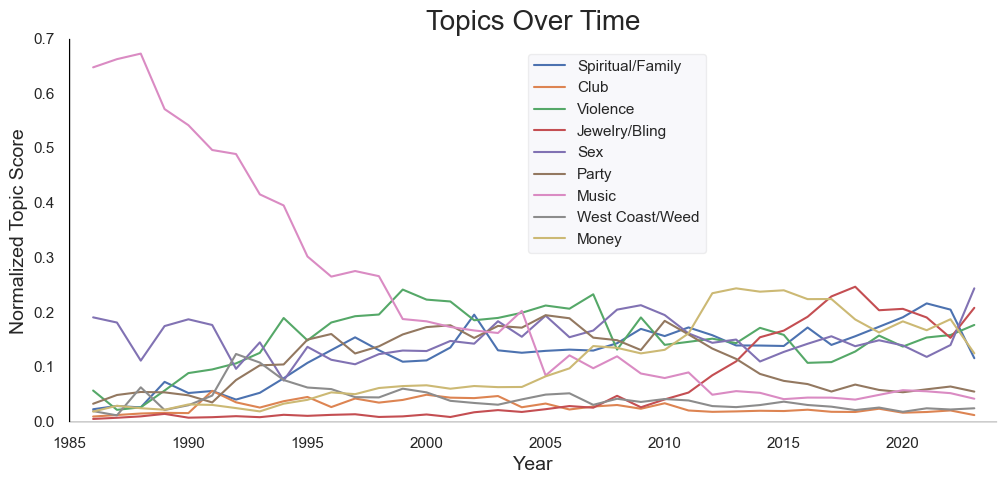

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,5)})
ax = plt.axes()
ax.set_facecolor('white')
sns.lineplot(x="Year", y="score", hue='Topics', data=TBY_rows)

plt.legend(loc='upper center', bbox_to_anchor=(.59,.98), framealpha=.3)
plt.title('Topics Over Time', fontsize=20)
plt.ylabel('Normalized Topic Score', fontsize = 14)
plt.xlabel('Year', fontsize=14)

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=1985, color='black', linewidth=1)

# Set xlim and ylim to desired limits
ax.set_xlim([1984.95, 2024])
ax.set_ylim([-0.0031, .7])

# Set the file name and save the plot as SVG
file_name = "images/Topics_over_time.svg"
plt.savefig(file_name, format="svg")

# word2vec

### Create word embeddings by artist region

In [547]:
# Filter the TOKEN table to include only nouns and verbs, excluding proper nouns.
CORP = TOKENS[TOKENS.pos.str.fullmatch(r"(NN|NNS|VB|VBD|VBG|VBN|VBP|VBZ)")]

In [548]:
CORP

pos_tuple  \
Artist                     Album                          Song          Token                        
2 Live Crew                As Clean as They Wanna Be (LP) City of Boom  1       (citycitycity, NN)   
                                                                        3               (boom, NN)   
                                                                        4      (bowchihbowbow, NN)   
                                                                        5       (citycitycity, NN)   
                                                                        7               (boom, NN)   
...                                                                                            ...   
YoungBoy Never Broke Again Until I Return                 Whitey Bulger 604            (dont, VBP)   
                                                                        607             (talk, VB)   
                                                                        609             (yeah, NN)   
                                                                        610               (i, NNS)   
                                                                        611             (say, VBP)   

                                                                               pos  \
Artist                     Album                          Song          Token        
2 Live Crew                As Clean as They Wanna Be (LP) City of Boom  1       NN   
                                                                        3       NN   
                                                                        4       NN   
                                                                        5       NN   
                                                                        7       NN   
...                                                                            ...   
YoungBoy Never Broke Again Until I Return                 Whitey Bulger 604    VBP   
                                                                        607     VB   
                                                                        609     NN   
                                                                        610    NNS   
                                                                        611    VBP   

                                                                                   token_str  \
Artist                     Album                          Song          Token                  
2 Live Crew                As Clean as They Wanna Be (LP) City of Boom  1       citycitycity   
                                                                        3               boom   
                                                                        4      bowchihbowbow   
                                                                        5       citycitycity   
                                                                        7               boom   
...                                                                                      ...   
YoungBoy Never Broke Again Until I Return                 Whitey Bulger 604             dont   
                                                                        607             talk   
                                                                        609             yeah   
                                                                        610                i   
                                                                        611              say   

                                                                                    term_str  
Artist                     Album                          Song          Token                 
2 Live Crew                As Clean as They Wanna Be (LP) City of Boom  1       citycitycity  
                                                                        3               boom  
              

In [549]:
VOCAB_W2V = CORP.term_str.value_counts().to_frame('n')
VOCAB_W2V.index.name = 'term_str'
VOCAB_W2V['pos_group'] = CORP[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1).str[:2]

In [550]:
BAG = Songs

CORP = CORP.groupby(BAG)\
                    .term_str.apply(lambda  x:  x.tolist())\
                    .reset_index()['term_str'].tolist()
CORP = [doc for doc in CORP if len(doc) > 1] # Lose single word docs

In [565]:
# word2vec parameters
w2v_params = dict(
    window = 2,
    vector_size = 256,
    min_count = 10
)

In [566]:
W2V_model = word2vec.Word2Vec(CORP, **w2v_params)

In [569]:
# Get model coordinates to plot

coords = pd.DataFrame(
    dict(
        vector = [W2V_model.wv[w] for w in W2V_model.wv.key_to_index], 
        term_str = list(W2V_model.wv.key_to_index)
    )).set_index('term_str')

## T-SNE

In [571]:
# Hyperparameters 

learning_rate = 200  
perplexity = 20  
n_components = 2  
init = 'random'  
n_iter = 1000  
random_state = 42

# T-SNE
tsne_engine = TSNE(perplexity=perplexity, n_components=n_components,
                   init=init, n_iter=n_iter, random_state=random_state)

# convert pd Series of lists to matrix
coords_matirx = np.array(coords.vector.to_list())

tsne_model = tsne_engine.fit_transform(np.array(coords.vector.to_list()))

In [572]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [581]:
coords

vector          x  \
term_str                                                                   
i           [-0.4867007, -0.08745559, 0.57512516, 0.427802... -73.106186   
im          [0.2346174, -0.354274, 0.29239655, -0.33081907... -47.411297   
got         [-0.15797137, -0.15450624, -0.32306308, -0.161... -41.365456   
get         [0.11814593, -0.27475908, 0.0802258, 0.7137248... -30.051619   
is          [-0.1380703, 0.21644281, -0.35713863, 0.104474... -48.815899   
...                                                       ...        ...   
cahoots     [0.09890229, -0.10705744, -0.044391233, 0.0612...  -6.439875   
renown      [0.12027674, -0.024216188, -0.062481258, 0.061... -17.992170   
eyewitness  [0.08304511, -0.11392173, -0.06930774, 0.05172...   8.674201   
loopy       [0.08230617, -0.046025585, -0.03574139, 0.0530...  26.874022   
instigator  [0.10744015, -0.09462689, -0.041427583, 0.0751...   1.154836   

                    y       n pos_group  
term_str                                 
i            5.737876  263507        NN  
im          -7.848827  105233        NN  
got        -36.826000   93139        VB  
get        -30.343180   74706        VB  
is          23.200794   65587        VB  
...               ...     ...       ...  
cahoots     21.601994      10        NN  
renown      31.265274      10        NN  
eyewitness  25.690527      10        NN  
loopy       28.158684      10        NN  
instigator  29.105009      10        NN  

[19057 rows x 5 columns]

In [573]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB_W2V.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [574]:
px.scatter(coords.reset_index(), 'x', 'y', 
           color='pos_group', 
           hover_name='term_str',
           text = 'term_str',
           size=coords['n'].apply(lambda x: np.log(x)),
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=8, family='Arial'),
                textposition='top center')

In [575]:
def complete_analogy(model, A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(model, positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [576]:
complete_analogy(W2V_model,'game', 'drugs', 'rap', 5)

term       sim
0       soul  0.334337
1     rappin  0.332511
2       drug  0.328403
3      abuse  0.322586
4  narcotics  0.321611

In [577]:
complete_analogy(W2V_model,'man', 'fly', 'car', 3)

term       sim
0  lamborghini  0.542879
1       garage  0.513484
2       coupes  0.491854

In [578]:
get_most_similar(W2V_model, 'hoes')

term       sim
0   broads  0.514551
1  trickin  0.507947
2     bros  0.498752
3  pimping  0.496404
4    sluts  0.495698
5  groupie  0.487746
6    thots  0.486700
7      hoe  0.483882
8  clothes  0.480576
9   pimpin  0.477864

In [579]:
get_most_similar(W2V_model, 'lies')

term       sim
0     truth  0.712875
1    rumors  0.648706
2     tales  0.646474
3     media  0.641286
4   stories  0.626706
5   secrets  0.623682
6  disguise  0.614945
7    demise  0.607015
8    alibis  0.588466
9     cries  0.584492

# Sentiment Analysis

In [580]:
salex_csv = 'salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [399]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [400]:
VOCAB_SENT = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [401]:
VOCAB_SENT.head()

n         p         i  n_chars max_pos  tfidf_mean  tfidf_sum  \
term_str                                                                      
love      24735  0.002277  8.778716        4      NN    0.003035  60.643661   
wan       24282  0.002235  8.805383        3     VBP    0.002436  48.678120   
money     21547  0.001983  8.977783        5      NN    0.002712  54.189633   
baby      19754  0.001818  9.103125        4      NN    0.003065  61.241390   
hit       15538  0.001430  9.449469        3     VBD    0.001923  38.429205   

          tfidf_max  anger  anticipation  disgust  fear  joy  negative  \
term_str                                                                 
love       0.306888      0             0        0     0    1         0   
wan        0.117850      0             0        0     1    0         1   
money      0.198829      1             1        0     0    1         0   
baby       0.362646      0             0        0     0    1         0   
hit        0.231114      1             0        0     0    0         1   

          positive  sadness  surprise  trust  sentiment  
term_str                                                 
love             1        0         0      0          1  
wan              0        1         0      0         -1  
money            1        0         1      1          1  
baby             1        0         0      0          1  
hit              0        0         0      0         -1

## Sentiment at artist level

In [402]:
# Group tfidf scores by artist
TFIDF_ARTIST_mean = TFIDF_SONGS.groupby('Artist').mean()

In [403]:
TFIDF_ARTIST_mean

term_str                           a        aa  aaa  aaaaa  aaaaaaa  \
Artist                                                                
2 Live Crew                 0.000339  0.000000  0.0    0.0      0.0   
21 Savage                   0.000540  0.000000  0.0    0.0      0.0   
2Pac                        0.000382  0.000000  0.0    0.0      0.0   
42 Dugg                     0.000401  0.000000  0.0    0.0      0.0   
50 Cent                     0.000363  0.000148  0.0    0.0      0.0   
...                              ...       ...  ...    ...      ...   
Wu-Tang Clan                0.000295  0.000077  0.0    0.0      0.0   
YG                          0.000404  0.000000  0.0    0.0      0.0   
Yasiin Bey                  0.000215  0.000000  0.0    0.0      0.0   
Young Thug                  0.000451  0.000000  0.0    0.0      0.0   
YoungBoy Never Broke Again  0.000275  0.000123  0.0    0.0      0.0   

term_str                    aaaaaaaaaaaaa  aaaaaaaaaaaaaa  aaaaaaaaaaaaaaah  \
Artist                                                                        
2 Live Crew                           0.0        0.000000               0.0   
21 Savage                             0.0        0.000000               0.0   
2Pac                                  0.0        0.000000               0.0   
42 Dugg                               0.0        0.000000               0.0   
50 Cent                               0.0        0.000000               0.0   
...                                   ...             ...               ...   
Wu-Tang Clan                          0.0        0.000226               0.0   
YG                                    0.0        0.000000               0.0   
Yasiin Bey                            0.0        0.000000               0.0   
Young Thug                            0.0        0.000000               0.0   
YoungBoy Never Broke Again            0.0        0.000000               0.0   

term_str                    aaaaaaaall  aaaaaaaay  ...  zzs  zzz  zzzero  \
Artist                                             ...                     
2 Live Crew                        0.0   0.000000  ...  0.0  0.0     0.0   
21 Savage                          0.0   0.000000  ...  0.0  0.0     0.0   
2Pac                               0.0   0.000000  ...  0.0  0.0     0.0   
42 Dugg                            0.0   0.000000  ...  0.0  0.0     0.0   
50 Cent                            0.0   0.000101  ...  0.0  0.0     0.0   
...                                ...        ...  ...  ...  ...     ...   
Wu-Tang Clan                       0.0   0.000000  ...  0.0  0.0     0.0   
YG                                 0.0   0.000000  ...  0.0  0.0     0.0   
Yasiin Bey                         0.0   0.000000  ...  0.0  0.0     0.0   
Young Thug                         0.0   0.000000  ...  0.0  0.0     0.0   
YoungBoy Never Broke Again         0.0   0.000000  ...  0.0  0.0     0.0   

term_str                    zzznoahh  zzzquil  zzzs  zzzzs  zzzzz  zzzzzone  \
Artist                                                                        
2 Live Crew                      0.0      0.0   0.0    0.0    0.0       0.0   
21 Savage                        0.0      0.0   0.0    0.0    0.0       0.0   
2Pac                             0.0      0.0   0.0    0.0    0.0       0.0   
42 Dugg                          0.0      0.0   0.0    0.0    0.0       0.0   
50 Cent                          0.0      0.0   0.0    0.0    0.0       0.0   
...                              ...      ...   ...    ...    ...       ...   
Wu-Tang Clan                     0.0      0.0   0.0    0.0    0.0       0.0   
YG                               0.0      0.0   0.0    0.0    0.0       0.0   
Yasiin Bey                       0.0      0.0   0.0    0.0    0.0       0.0   
Young Thug                       0.0      0.0   0.0    0.0    0.0       0.0   
YoungBoy Never Broke Again       0.0      0.0   0.0    0.0    0.0       0.0   

term_str                    zzz

In [404]:
BOW_artists['tfidf'] = TFIDF_ARTIST_mean.stack()

In [405]:
BOW_SENT = BOW_artists.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [406]:
# Weight emotions by tf-idf
for col in emo_cols:
    BOW_SENT[col] = BOW_SENT[col] * BOW_SENT.tfidf

In [407]:
BOW_SENT.head()

n     tfidf max_pos     anger  anticipation   disgust  \
Artist      term_str                                                           
2 Live Crew abortion   2  0.000417      NN  0.000000           0.0  0.000417   
            abuse      4  0.001024      NN  0.001024           0.0  0.001024   
            achieve    1  0.000190      VB  0.000000           0.0  0.000000   
            affection  1  0.000170      NN  0.000000           0.0  0.000000   
            afraid     1  0.000117      JJ  0.000000           0.0  0.000000   

                           fear      joy   sadness  surprise    trust  \
Artist      term_str                                                    
2 Live Crew abortion   0.000417  0.00000  0.000417       0.0  0.00000   
            abuse      0.001024  0.00000  0.001024       0.0  0.00000   
            achieve    0.000000  0.00019  0.000000       0.0  0.00019   
            affection  0.000000  0.00017  0.000000       0.0  0.00017   
            afraid     0.000117  0.00000  0.000000       0.0  0.00000   

                       sentiment  
Artist      term_str              
2 Live Crew abortion   -0.000417  
            abuse      -0.001024  
            achieve     0.000190  
            affection   0.000170  
            afraid     -0.000117

In [584]:
SENT_WORDS= BOW_SENT.groupby('term_str').mean()

In [408]:
# calculate mean sentiment per artist
ARTIST_SENT = BOW_SENT.groupby('Artist').mean()

In [409]:
# get top and bottom artists for each sent score
top_emo_artist = []
bottom_emo_artist = []
for emotion in emo_cols:
    top_emo_artist.append(ARTIST_SENT.sort_values(emotion, ascending=False).head(1).index.values[0])
    bottom_emo_artist.append(ARTIST_SENT.sort_values(emotion, ascending=False).tail(1).index.values[0])
    
top_emo_artist = pd.Series(top_emo_artist, name='1st place')
bottom_emo_artist = pd.Series(bottom_emo_artist, name='1st place')

In [410]:
Top_artist_sents = pd.DataFrame([top_emo_artist.values,bottom_emo_artist], columns=emo_cols)

In [411]:
Top_artist_sents = Top_artist_sents.rename(index={0: 'Highest score', 1:'Lowest score'})

In [412]:
Top_artist_sents

anger anticipation            disgust   fear     joy  \
Highest score  21 Savage  Kurtis Blow  Ol’ Dirty Bastard  N.W.A   Lizzo   
Lowest score       Logic       Eminem              Drake  Drake  Eminem   

                 sadness surprise        trust    sentiment  
Highest score  Nate Dogg  Cardi B  Kurtis Blow  Kurtis Blow  
Lowest score      Common   Eminem       Eminem        N.W.A

In [413]:
pretty_sents_table = build_table(Top_artist_sents, 'blue_light', font_size='25px', index=True)

In [414]:
# save table
with open('images/pretty_sents_table.html', 'w') as f:
    f.write(pretty_sents_table)

In [415]:
ARTIST_SENT.head()

n     tfidf     anger  anticipation   disgust      fear  \
Artist                                                                         
2 Live Crew   6.704835  0.000596  0.000173      0.000115  0.000142  0.000171   
21 Savage    10.141700  0.000582  0.000276      0.000103  0.000148  0.000286   
2Pac         11.972315  0.000383  0.000158      0.000088  0.000101  0.000191   
42 Dugg       5.840909  0.000676  0.000259      0.000151  0.000152  0.000254   
50 Cent      11.106409  0.000307  0.000115      0.000072  0.000073  0.000127   

                  joy   sadness  surprise     trust  sentiment  
Artist                                                          
2 Live Crew  0.000186  0.000170  0.000104  0.000181  -0.000070  
21 Savage    0.000126  0.000182  0.000121  0.000131  -0.000229  
2Pac         0.000089  0.000142  0.000061  0.000099  -0.000123  
42 Dugg      0.000196  0.000209  0.000104  0.000206  -0.000125  
50 Cent      0.000084  0.000104  0.000060  0.000085  -0.000069

In [416]:
# add year to artist sent df
ARTIST_SENT['Year'] = LIB['Year']

In [417]:
ARTIST_SENT_YEARS = ARTIST_SENT.groupby('Year').mean()

In [418]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 10), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

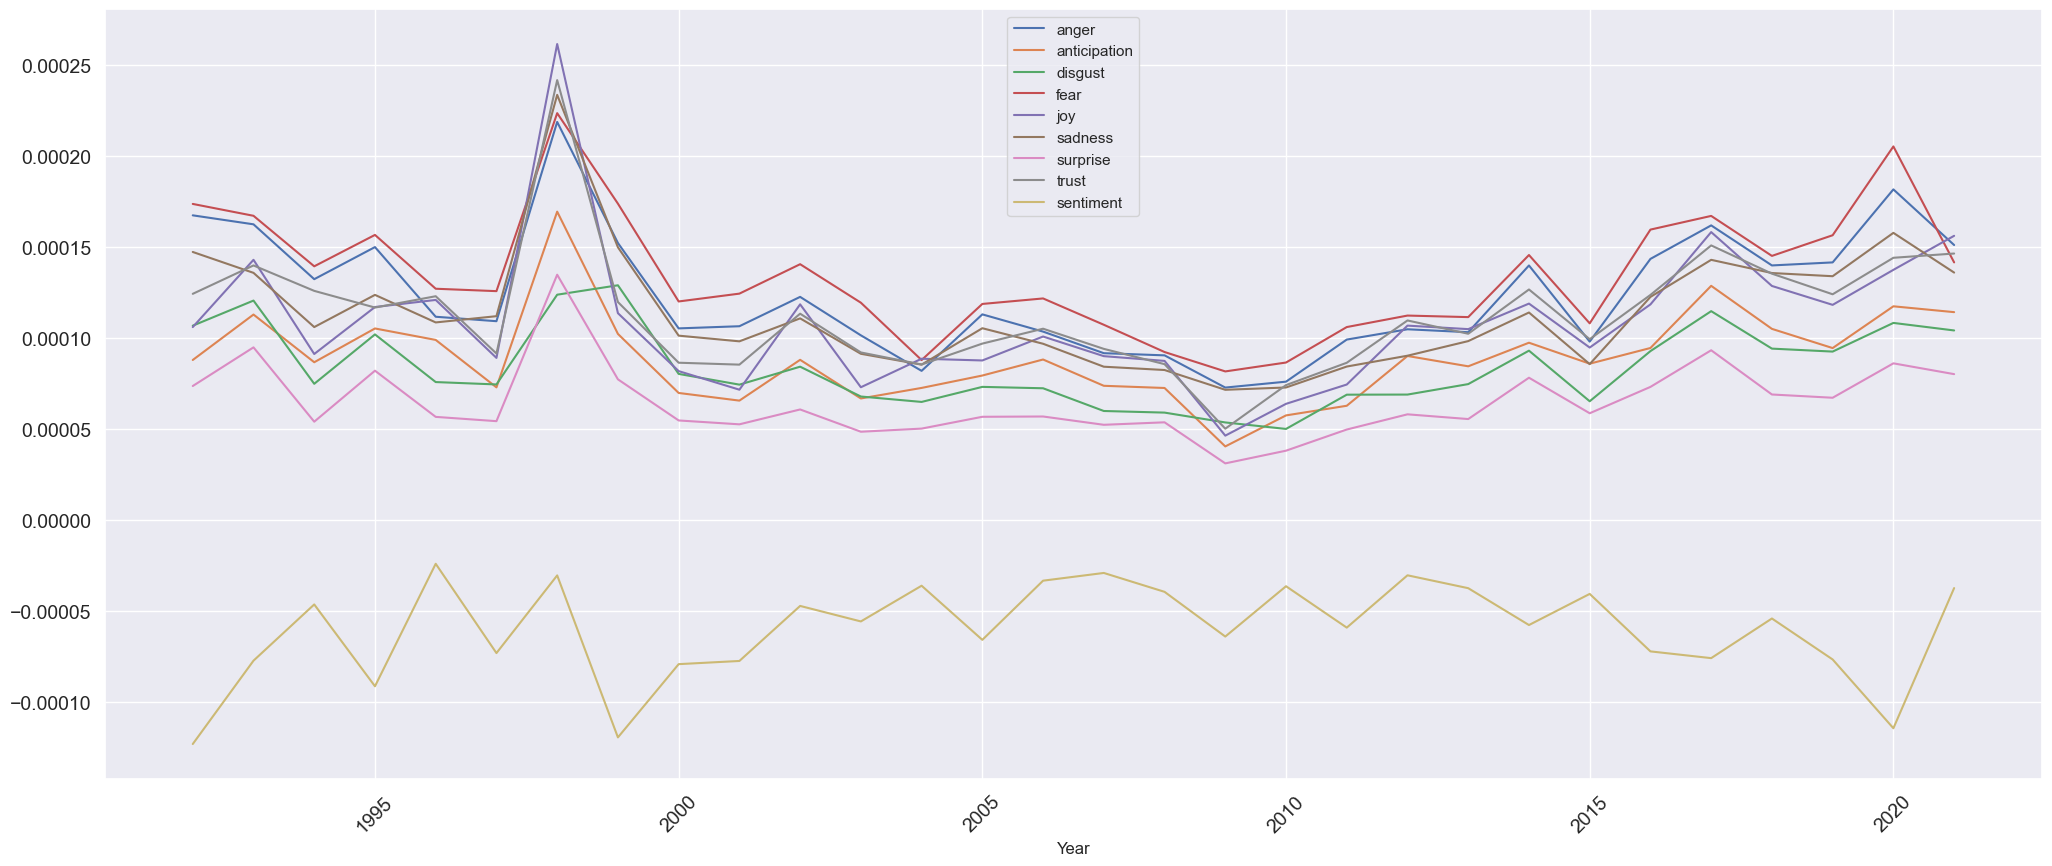

In [419]:
plot_sentiments(ARTIST_SENT_YEARS[5:], emo_cols)

## Sentiment at album level

In [420]:
# Group tfidf scores by album
TFIDF_ALBUMS = TFIDF_SONGS.groupby(['Artist','Album']).mean()

In [421]:
BOW_albums['tfidf'] = TFIDF_ALBUMS.stack()

In [422]:
BOW_ALBUM_SENT = BOW_albums.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [423]:
# Weight emotions by tf-idf
for col in emo_cols:
    BOW_ALBUM_SENT[col] = BOW_ALBUM_SENT[col] * BOW_ALBUM_SENT.tfidf

In [587]:
BOW_ALBUM_SENT.head()

n     tfidf max_pos  \
Artist      Album                          term_str                        
2 Live Crew As Clean as They Wanna Be (LP) abuse     1  0.008182      NN   
                                           alive     1  0.003935      JJ   
                                           baby      2  0.003620      NN   
                                           bad       1  0.001636      JJ   
                                           battle    2  0.007157      NN   

                                                        anger  anticipation  \
Artist      Album                          term_str                           
2 Live Crew As Clean as They Wanna Be (LP) abuse     0.008182      0.000000   
                                           alive     0.000000      0.003935   
                                           baby      0.000000      0.000000   
                                           bad       0.001636      0.000000   
                                           battle    0.007157      0.000000   

                                                      disgust      fear  \
Artist      Album                          term_str                       
2 Live Crew As Clean as They Wanna Be (LP) abuse     0.008182  0.008182   
                                           alive     0.000000  0.000000   
                                           baby      0.000000  0.000000   
                                           bad       0.001636  0.001636   
                                           battle    0.000000  0.000000   

                                                          joy   sadness  \
Artist      Album                          term_str                       
2 Live Crew As Clean as They Wanna Be (LP) abuse     0.000000  0.008182   
                                           alive     0.003935  0.000000   
                                           baby      0.003620  0.000000   
                                           bad       0.000000  0.001636   
                                           battle    0.000000  0.000000   

                                                     surprise     trust  \
Artist      Album                          term_str                       
2 Live Crew As Clean as They Wanna Be (LP) abuse          0.0  0.000000   
                                           alive          0.0  0.003935   
                                           baby           0.0  0.000000   
                                           bad            0.0  0.000000   
                                           battle         0.0  0.000000   

                                                     sentiment  
Artist      Album                          term_str             
2 Live Crew As Clean as They Wanna Be (LP) abuse     -0.008182  
                                           alive      0.003935  
                                           baby       0.003620  
                                           bad       -0.001636  
                                           battle    -0.007157

In [425]:
ALBUM_SENT = BOW_ALBUM_SENT.groupby(['Artist','Album']).mean()

In [426]:
ALBUM_SENT.head()

n  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    1.666667   
            As Nasty as They Wanna Be                         2.430894   
            Banned in the U.S.A.                              2.037736   
            Boyz N the Hood (Music From the Motion Picture)   1.125000   
            Greatest Hits                                     1.354430   

                                                                 tfidf  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.007226   
            As Nasty as They Wanna Be                         0.001516   
            Banned in the U.S.A.                              0.001978   
            Boyz N the Hood (Music From the Motion Picture)   0.017498   
            Greatest Hits                                     0.002959   

                                                                 anger  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.002053   
            As Nasty as They Wanna Be                         0.000549   
            Banned in the U.S.A.                              0.000505   
            Boyz N the Hood (Music From the Motion Picture)   0.007283   
            Greatest Hits                                     0.000828   

                                                              anticipation  \
Artist      Album                                                            
2 Live Crew As Clean as They Wanna Be (LP)                        0.000837   
            As Nasty as They Wanna Be                             0.000335   
            Banned in the U.S.A.                                  0.000474   
            Boyz N the Hood (Music From the Motion Picture)       0.003444   
            Greatest Hits                                         0.000556   

                                                               disgust  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.001614   
            As Nasty as They Wanna Be                         0.000424   
            Banned in the U.S.A.                              0.000401   
            Boyz N the Hood (Music From the Motion Picture)   0.005028   
            Greatest Hits                                     0.000574   

                                                                  fear  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.001778   
            As Nasty as They Wanna Be                         0.000460   
            Banned in the U.S.A.                              0.000679   
            Boyz N the Hood (Music From the Motion Picture)   0.011902   
            Greatest Hits                                     0.000882   

                                                                   joy  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.001063   
            As Nasty as They Wanna Be                         0.000477   
            Banned in the U.S.A.                              0.000618   
            Boyz N the Hood (Music From the Motion Picture)   0.001264   
            Greatest Hits                                     0.000818   

                                                               sadness  \
Artist      Album                                                        
2 Live Crew As Clean as They Wanna Be (LP)                    0.003753   
            As Nasty as They Wanna Be                         0.000454   
            Banned in the U.S.A.                              0.000720   
            Boyz N the Hood (Music Fro

In [427]:
ALBUM_YEARS = CORPUS.groupby(['Artist','Album'])['Year'].median().dropna()
ALBUM_YEARS = ALBUM_YEARS.round().astype(int)

In [428]:
ALBUM_SENT['Year'] = ALBUM_YEARS
ALBUM_SENT.dropna(inplace=True)

In [444]:
ALBUM_SENT_YEARS = ALBUM_SENT.groupby('Year').mean()

In [445]:
ALBUM_SENT_YEARS.tail(36)

n     tfidf     anger  anticipation   disgust      fear  \
Year                                                                     
1988.0  2.224237  0.003660  0.001106      0.000828  0.001000  0.001042   
1989.0  1.899248  0.004160  0.001107      0.001058  0.000675  0.001290   
1990.0  2.183878  0.005237  0.001773      0.001370  0.000855  0.001439   
1991.0  2.582186  0.005740  0.002260      0.001631  0.001030  0.002120   
1992.0  2.168316  0.005353  0.001508      0.001496  0.001288  0.001944   
1993.0  2.322741  0.003881  0.001126      0.000776  0.000838  0.001333   
1994.0  2.064191  0.005560  0.002139      0.000975  0.001828  0.002435   
1995.0  2.014678  0.008605  0.002052      0.001448  0.001721  0.002537   
1996.0  2.109829  0.008751  0.003003      0.001763  0.001683  0.003179   
1997.0  1.937838  0.007384  0.002290      0.001921  0.001303  0.002616   
1998.0  1.993566  0.006417  0.002351      0.001452  0.001559  0.002626   
1999.0  2.085019  0.004959  0.001779      0.000947  0.001147  0.002092   
2000.0  2.440355  0.006619  0.002334      0.001192  0.001808  0.002024   
2001.0  2.158943  0.006564  0.002376      0.001575  0.001588  0.002410   
2002.0  2.126286  0.006405  0.002343      0.001409  0.001432  0.002398   
2003.0  2.000749  0.006639  0.002296      0.001738  0.001837  0.002795   
2004.0  2.314387  0.007586  0.002184      0.001190  0.001371  0.002753   
2005.0  2.035367  0.006892  0.002409      0.001544  0.001787  0.002268   
2006.0  2.095994  0.004956  0.001889      0.001059  0.001011  0.002257   
2007.0  2.298192  0.006042  0.002382      0.001397  0.001693  0.002761   
2008.0  2.200219  0.007457  0.002852      0.002274  0.001759  0.003229   
2009.0  2.265035  0.007066  0.001803      0.002159  0.001600  0.002102   
2010.0  2.185700  0.005356  0.001810      0.001196  0.001331  0.002013   
2011.0  2.130400  0.007306  0.002285      0.001972  0.001581  0.002422   
2012.0  2.250748  0.007241  0.002333      0.002042  0.001539  0.002708   
2013.0  2.246228  0.008329  0.002677      0.002171  0.001939  0.002554   
2014.0  2.357947  0.007487  0.002467      0.001851  0.001543  0.002769   
2015.0  2.541651  0.007480  0.002617      0.001775  0.001325  0.002980   
2016.0  2.694240  0.006350  0.002080      0.001678  0.001104  0.002142   
2017.0  2.630535  0.005740  0.002032      0.001071  0.001351  0.002258   
2018.0  2.491496  0.007187  0.002419      0.001588  0.001647  0.002746   
2019.0  2.558770  0.006770  0.002492      0.001584  0.001465  0.002488   
2020.0  2.420507  0.006305  0.002333      0.001493  0.001552  0.002574   
2021.0  2.167833  0.009818  0.003000      0.002699  0.001738  0.003868   
2022.0  2.125975  0.006079  0.002134      0.001593  0.001500  0.002293   
2023.0  2.116585  0.008769  0.003063      0.002251  0.002000  0.002995   

             joy   sadness  surprise     trust  sentiment  
Year                                                       
1988.0  0.000889  0.000991  0.000472  0.001213  -0.000494  
1989.0  0.001041  0.001023  0.000574  0.001334  -0.000659  
1990.0  0.001674  0.001302  0.000646  0.001659  -0.000130  
1991.0  0.001735  0.001430  0.001265  0.001493  -0.001024  
1992.0  0.001855  0.001403  0.001313  0.001551  -0.000421  
1993.0  0.001063  0.001351  0.000698  0.001086  -0.000906  
1994.0  0.001157  0.001725  0.000827  0.001519  -0.001894  
1995.0  0.002982  0.002386  0.001636  0.002268  -0.000732  
1996.0  0.002415  0.002737  0.001502  0.002641  -0.000981  
1997.0  0.002197  0.002324  0.001594  0.002256  -0.000913  
1998.0  0.001542  0.002087  0.001103  0.001669  -0.001613  
1999.0  0.001261  0.001709  0.000778  0.001286  -0.001259  
2000.0  0.002485  0.001756  0.000883  0.001548  -0.000505  
2001.0  0.001920  0.002038  0.001402  0.002054  -0.001167  
2002.0  0.001732  0.001951  0.001082  0.001547  -0.001355  
2003.0  0.002058  0.002299  0.001479  0.002057  -0.001351  
2004.0  0.002609  0.002556  0.001170  0.001395  -0.001056  
2005.0  0.001936  0.002124  0.000951  0.001875  -0.001172  
20

In [446]:
AST = ALBUM_SENT_YEARS.drop(columns=['n', 'tfidf']).reset_index()\
            .melt('Year', var_name='Topics', value_name='score')

In [447]:
AST

Year     Topics     score
0    1980.0      anger  0.000631
1    1981.0      anger  0.002272
2    1982.0      anger  0.010742
3    1983.0      anger  0.001602
4    1984.0      anger  0.000607
..      ...        ...       ...
391  2019.0  sentiment -0.001399
392  2020.0  sentiment -0.001202
393  2021.0  sentiment -0.001104
394  2022.0  sentiment -0.000635
395  2023.0  sentiment -0.001708

[396 rows x 3 columns]

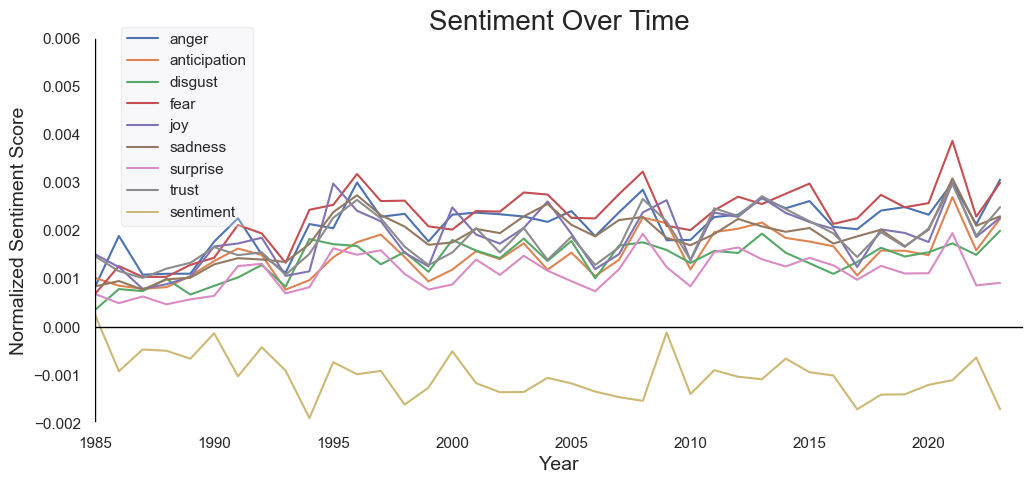

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,5)})
ax = plt.axes()
ax.set_facecolor('white')
sns.lineplot(x="Year", y="score", hue='Topics', data=AST)

plt.legend(loc='upper center', bbox_to_anchor=(0.1,1.05), framealpha=.3)
plt.title('Sentiment Over Time', fontsize=20)
plt.ylabel('Normalized Sentiment Score', fontsize = 14)
plt.xlabel('Year', fontsize=14)

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=1985, color='black', linewidth=1)

# Set xlim and ylim to desired limits
ax.set_xlim([1984.95, 2024])
ax.set_ylim([-0.002, .006])

# Set the file name and save the plot as SVG
file_name = "images/Sent_over_time.svg"
plt.savefig(file_name, format="svg")

# Save DataFrames to CSV

In [535]:
LIB.to_csv('data_files/LIB.csv')

In [536]:
TOKENS.to_csv('data_files/TOKENS.csv')

In [537]:
FULL_CORPUS.to_csv('data_files/FULL_CORPUS.csv')

In [538]:
VOCAB.to_csv('data_files/VOCAB.csv')

In [593]:
CORPUS.to_csv('data_files/CORPUS.csv')

### PCA

In [541]:
LOADINGS.to_csv('data_files/PCA_Words_Components.csv')

In [542]:
DCM.to_csv('data_files/PCA_Docs_Components.csv')

### LDA Topic Modeling

In [543]:
THETA.to_csv('data_files/LDA_Doc_Topic(THETA).csv')

In [544]:
PHI.to_csv('data_files/LDA_Word_Topic(PHI).csv')

In [591]:
TOPICS.to_csv('data_files/LDA_Topics.csv')

### word2vec embeddings

In [582]:
coords.to_csv('data_files/word2vec_terms_embeddings_with_TSNE_coords.csv')

### Sentiment Analysis

In [586]:
SENT_WORDS.to_csv('data_files/Sentiment_VOCAB.csv')

In [590]:
BOW_ALBUM_SENT.to_csv('data_files/Sentiment_DOCS.csv')